# Prophet
Author: Geovanna Santos Nobre de Oliveira

In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from fbprophet import Prophet
import pandas as pd
import numpy as np 

%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [3]:
plt.rcParams['figure.figsize'] = (20, 10)

## Import pandas

In [3]:
df = pd.read_csv('../../00_data/daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


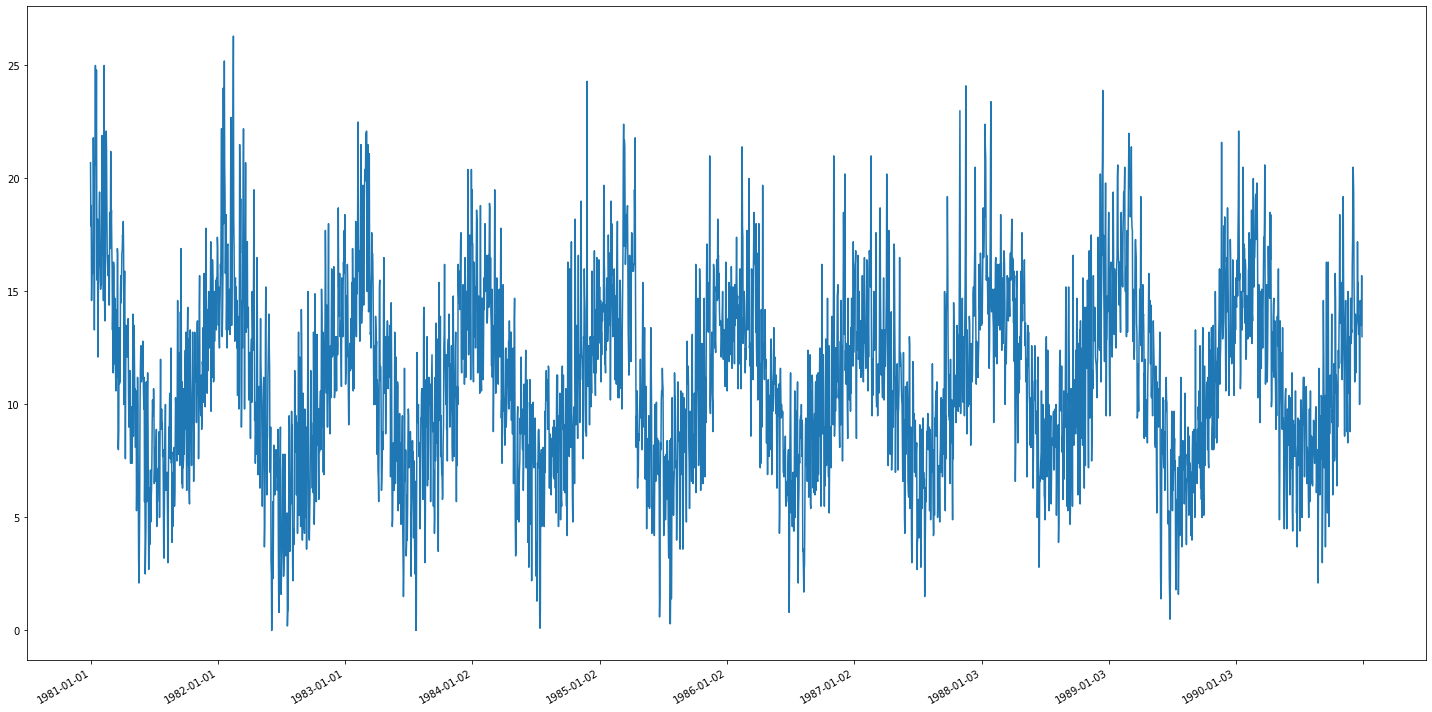

In [6]:
fig, ax = plt.subplots()

locator = mdates.AutoDateLocator()

ax.plot(df.Date, df.Temp)

ax.xaxis.set_major_locator(locator)

ax.set_xlabel=('Date')
ax.set_ylabel=('Minimun Temperature (deg C)')

ax.set_title=('Daily Minimum Temperature')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## Quick Start

In [7]:
# Prophet expects that the dates are called 'ds' and the target is called 'y'
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [8]:
m = Prophet()
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       6461.64   0.000338919       156.003   3.282e-06       0.001      140  LS failed, Hessian reset 
      99       6461.88   0.000712349       73.6732           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6462.58   0.000358319       83.3563      0.2928      0.2928      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       6462.81   5.88281e-05       92.9573   6.333e-07       0.001      442  LS failed, Hessian reset 
     299       6462.81   4.47092e-06       76.7081      0.9698      0.9698      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       6462.81   6.22013e-08       70.1397      0.2515      0.2515      479   
Optimization terminate

In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4010,1991-12-27
4011,1991-12-28
4012,1991-12-29
4013,1991-12-30
4014,1991-12-31


In [10]:
forecast = m.predict(future)
forecast.tail()

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4010,1991-12-27,11.556940,11.087009,17.697242,11.469186,11.643977,2.899968,2.899968,2.899968,-0.019839,-0.019839,-0.019839,2.919807,2.919807,2.919807,0.0,0.0,0.0,14.456909
4011,1991-12-28,11.556924,11.110509,17.599870,11.468876,11.644248,2.918376,2.918376,2.918376,-0.060106,-0.060106,-0.060106,2.978482,2.978482,2.978482,0.0,0.0,0.0,14.475300
4012,1991-12-29,11.556907,10.805568,17.903008,11.468481,11.644520,2.889547,2.889547,2.889547,-0.153082,-0.153082,-0.153082,3.042628,3.042628,3.042628,0.0,0.0,0.0,14.446454
4013,1991-12-30,11.556890,10.918962,18.218485,11.468179,11.644792,3.091785,3.091785,3.091785,-0.019713,-0.019713,-0.019713,3.111498,3.111498,3.111498,0.0,0.0,0.0,14.648675
4014,1991-12-31,11.556874,11.172474,18.397653,11.467628,11.645064,3.262659,3.262659,3.262659,0.078472,0.078472,0.078472,3.184186,3.184186,3.184186,0.0,0.0,0.0,14.819532


In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4010,1991-12-27,14.456909,11.087009,17.697242
4011,1991-12-28,14.475300,11.110509,17.599870
4012,1991-12-29,14.446454,10.805568,17.903008
4013,1991-12-30,14.648675,10.918962,18.218485
4014,1991-12-31,14.819532,11.172474,18.397653


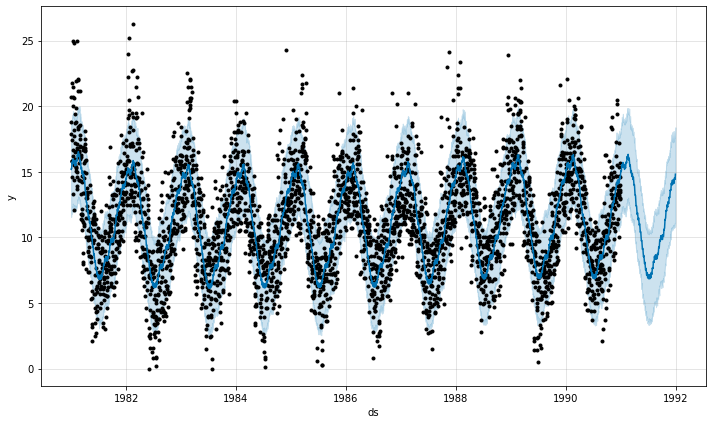

In [12]:
fig1 = m.plot(forecast)

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


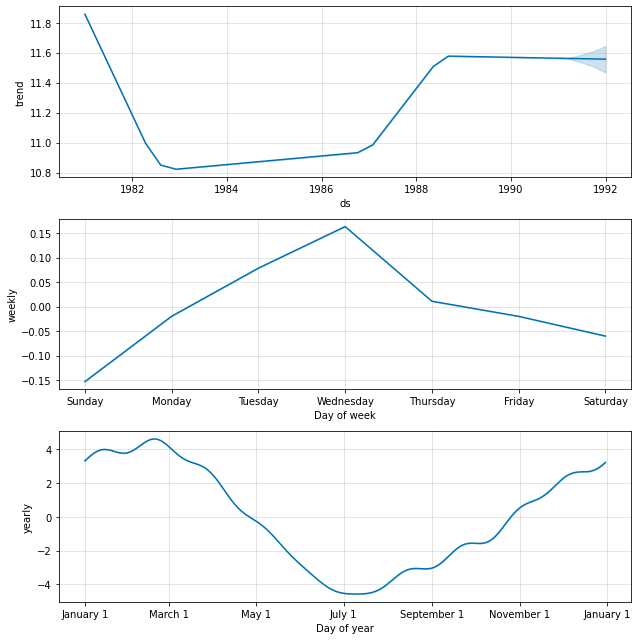

In [13]:
fig2 = m.plot_components(forecast)

## Prophet's Functionality

### Trend Changepoints

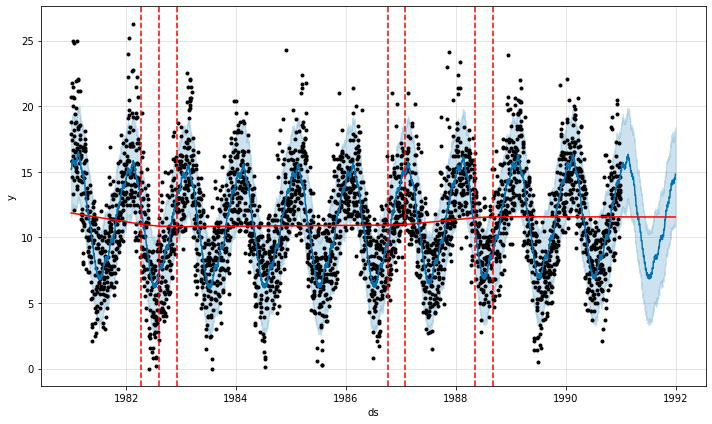

In [14]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Trend Flexibility

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6441.45   0.000147489       682.073      0.7078      0.7078      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6443.09   2.83826e-07       506.113      0.6981      0.6981      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       6443.09   3.56812e-08       799.546      0.4017           1      286   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


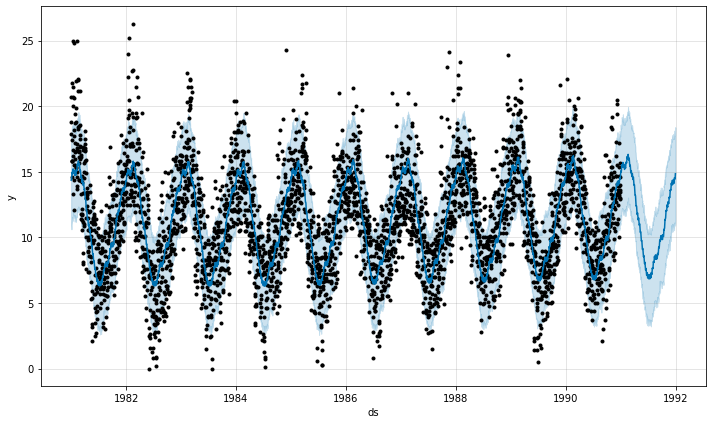

In [15]:
m = Prophet(changepoint_prior_scale=0.005)

forecast = m.fit(df).predict(future)

fig = m.plot(forecast)

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


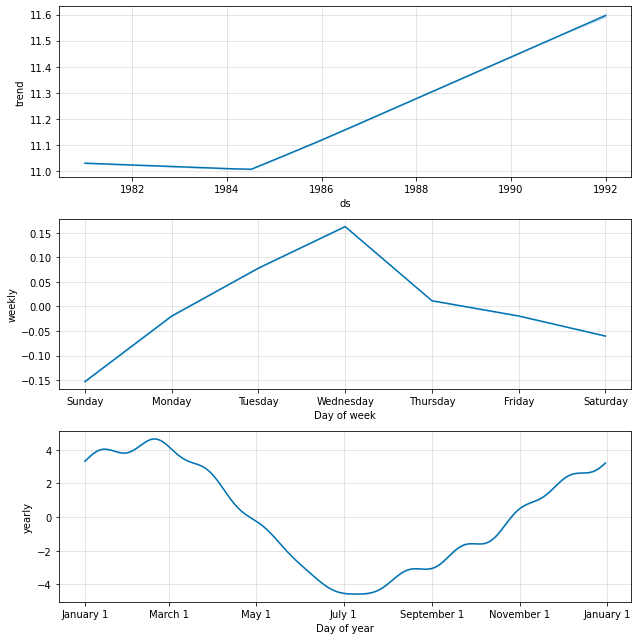

In [16]:
fig2 = m.plot_components(forecast)

### Visualize seasonality

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       6461.64   0.000338919       156.003   3.282e-06       0.001      140  LS failed, Hessian reset 
      99       6461.88   0.000712349       73.6732           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6462.58   0.000358319       83.3563      0.2928      0.2928      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       6462.81   5.88281e-05       92.9573   6.333e-07       0.001      442  LS failed, Hessian reset 
     299       6462.81   4.47092e-06       76.7081      0.9698      0.9698      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       6462.81   6.22013e-08       70.1397      0.2515      0.2515      479   
Optimization terminate

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


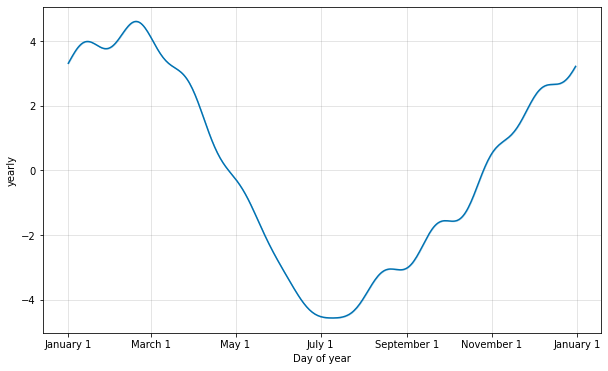

In [17]:
from fbprophet.plot import plot_yearly

m = Prophet().fit(df)
a = plot_yearly(m)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6482.39    0.00223912       78.6876           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136        6482.7   0.000164493       130.563   1.788e-06       0.001      222  LS failed, Hessian reset 
     199        6482.8   0.000150534        70.253           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       6482.94   0.000185859       124.677   1.596e-06       0.001      372  LS failed, Hessian reset 
     269       6483.05   1.94626e-05       69.0285   2.693e-07       0.001      467  LS failed, Hessian reset 
     299       6483.06   0.000158566       71.6752           1           1      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


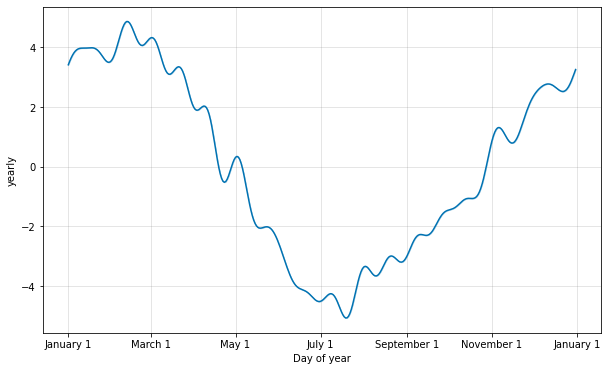

In [18]:
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6455.27    0.00611844       138.652           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       6455.73    0.00012992       69.2306    1.11e-06       0.001      281  LS failed, Hessian reset 
     199       6455.79   1.55091e-05       78.3789      0.2901      0.2901      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231        6455.8   1.20781e-07       67.8465      0.1104           1      370   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


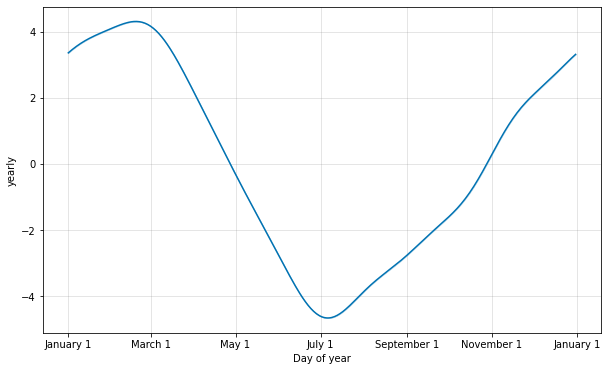

In [19]:
m = Prophet(yearly_seasonality=7).fit(df)
a = plot_yearly(m)

### Uncertainty intervals

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       6461.64   0.000338919       156.003   3.282e-06       0.001      140  LS failed, Hessian reset 
      99       6461.88   0.000712349       73.6732           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6462.58   0.000358319       83.3563      0.2928      0.2928      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       6462.81   5.88281e-05       92.9573   6.333e-07       0.001      442  LS failed, Hessian reset 
     299       6462.81   4.47092e-06       76.7081      0.9698      0.9698      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       6462.81   6.22013e-08       70.1397      0.2515      0.2515      479   
Optimization terminate

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


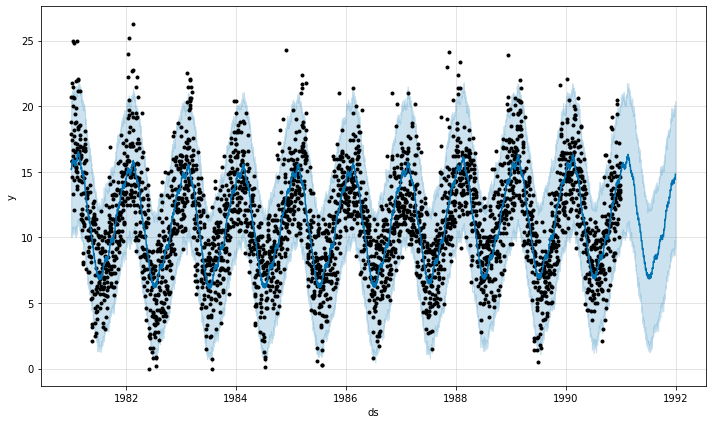

In [20]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

fig = m.plot(forecast)

### Cross-validation and performance metrics

In [21]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')

df_cv.head()

INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65       1338.88   0.000896598       103.519   1.111e-05       0.001      118  LS failed, Hessian reset 
      99       1338.99   1.97913e-05        97.275      0.3951           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       1339.11   0.000617956       78.2365   8.196e-06       0.001      219  LS failed, Hessian reset 
     168       1339.35   0.000526851       90.2656    6.36e-06       0.001      302  LS failed, Hessian reset 
     199        1339.4   8.36396e-06        72.361           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       1339.47     0.0011039       137.303   7.121e-06       0.001      437  LS failed, Hessian reset 
     299       1339.54   2.31824e-05       68.5846           1   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1636.33    0.00141745       83.7622           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1637.16    0.00252532       110.592   2.328e-05       0.001      192  LS failed, Hessian reset 
     199       1637.42    0.00218939       98.6986           1           1      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210        1637.6   0.000486602       102.595   5.031e-06       0.001      362  LS failed, Hessian reset 
     299       1637.71   9.00936e-06        92.095      0.5908           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335       1637.71   9.94458e-07       75.3916      0.3883           1      515   
Optimization terminat

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       1956.35    0.00196717       176.025   3.112e-05       0.001      160  LS failed, Hessian reset 
      99       1956.43    0.00137946       86.0375           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       1956.66   0.000516721       89.1369   9.325e-06       0.001      322  LS failed, Hessian reset 
     199       1956.69    3.5818e-06       71.3184     0.05253     0.05253      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1956.78   0.000754514       78.8811      0.1344      0.5053      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     302       1956.78   0.000281831        90.836   3.559e-06       0.001      541  LS failed, Hessian rese

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2278.24    0.00193236       57.1464      0.6019      0.6019      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       2278.95   0.000427201       79.1973   5.045e-06       0.001      239  LS failed, Hessian reset 
     199       2278.97   4.69468e-06       65.6435      0.6403      0.6403      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2279.01   1.15878e-07       62.2113      0.4829      0.4829      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       2279.01   7.38393e-07       79.8905           1           1      448   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       2598.16   0.000367741       81.6103   5.013e-06       0.001      138  LS failed, Hessian reset 
      99       2598.33    0.00206854       80.3784      0.4879           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2598.79   0.000350507       66.0113      0.5722           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       2598.82    5.4438e-05       73.2399   7.939e-07       0.001      373  LS failed, Hessian reset 
     268       2598.82   3.42756e-08       76.7159   0.0009601           1      429   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2883.53     0.0093878       210.329           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2886.38    0.00018869       75.8615           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       2886.53   0.000371445       66.9282   5.019e-06       0.001      439  LS failed, Hessian reset 
     299       2886.64   8.35152e-05       68.7889      0.3435      0.3435      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       2886.66   2.25903e-07       77.6172      0.3862           1      534   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       3218.57    0.00254503       257.961   2.089e-05       0.001      148  LS failed, Hessian reset 
      99       3218.77   0.000120091       64.6826       1.576           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       3218.79   1.28935e-05       81.0169   1.533e-07       0.001      271  LS failed, Hessian reset 
     162        3218.8   9.40331e-08       65.8056     0.05576           1      292   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      59       3548.36   0.000363514       108.735   4.505e-06       0.001      103  LS failed, Hessian reset 
      99       3549.23     0.0010316       84.3291           1           1      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       3549.85   3.57786e-05        86.982   4.599e-07       0.001      301  LS failed, Hessian reset 
     190       3549.85   1.91398e-07       54.4448      0.2386           1      334   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      67       3866.51   0.000323108       109.954   2.344e-06       0.001      126  LS failed, Hessian reset 
      99       3866.67   2.64626e-06       57.3005           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3866.87   7.46998e-05       76.7484           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       3867.68   3.42242e-05       70.5462   5.173e-07       0.001      451  LS failed, Hessian reset 
     299       3867.68   2.56078e-06       63.8576      0.2496     0.08112      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       3867.68   5.82587e-08       67.3295       0.121           1      489   
Optimization terminate

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      70       4178.57    0.00029494        99.822   3.583e-06       0.001      127  LS failed, Hessian reset 
      99       4178.79   8.18315e-05        85.128      0.4744      0.4744      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       4179.13   0.000274806       112.521    2.31e-06       0.001      241  LS failed, Hessian reset 
     158       4179.55   0.000211256        65.305   2.673e-06       0.001      316  LS failed, Hessian reset 
     199       4179.57   2.68638e-05       74.4351           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       4179.71   0.000177444       71.3702   2.306e-06       0.001      437  LS failed, Hessian reset 
     297       4179.81    6.8186e-06       77.6006   9.424e-08   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4491.49   9.62908e-05       83.1821           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       4491.55   0.000206382       85.3053   2.138e-06       0.001      184  LS failed, Hessian reset 
     199        4491.7    0.00353754       94.2496      0.9407      0.9684      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       4491.71   0.000197978       98.7665   2.101e-06       0.001      335  LS failed, Hessian reset 
     299       4491.77   4.71934e-06       85.2544      0.7359      0.7359      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       4491.77   3.02212e-07       75.2811           1           1      479   
Optimization terminate

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       4811.57   0.000650653       216.669   5.886e-06       0.001      155  LS failed, Hessian reset 
      99       4811.77   0.000146441       83.2171      0.4787      0.4787      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       4812.88   0.000940432       172.508   1.162e-05       0.001      254  LS failed, Hessian reset 
     199       4813.65   0.000360284       63.3909      0.7552      0.7552      309   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4814.41   4.93336e-06       65.3597           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4814.45   2.08049e-05       76.6364      0.2289           1      562   
    Iter      log pro

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       5129.87   0.000377657       162.111   3.822e-06       0.001      151  LS failed, Hessian reset 
      99       5130.05   0.000421419       97.5314      0.2249           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5130.41   0.000254668       73.5454           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5130.67   0.000261682       104.469   4.748e-06       0.001      343  LS failed, Hessian reset 
     299       5131.12   0.000339671        66.883           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       5131.18   4.45792e-07       77.8381           1           1      531   
Optimization terminat

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5447.74   0.000825635       101.484           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       5447.83   1.71466e-07       81.0063      0.6365      0.6365      173   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5782.66    0.00123543       110.005       0.641       0.641      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       5783.43   0.000178493       97.9808    1.85e-06       0.001      228  LS failed, Hessian reset 
     199       5783.53   5.69045e-06       92.1245           1           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       5783.53    1.5066e-06       74.3582   1.875e-08       0.001      365  LS failed, Hessian reset 
     219       5783.53   4.08104e-07       52.9321      0.8374      0.8374      367   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1983-02-07,15.663503,11.991380,19.138718,20.3,1983-02-06
1,1983-02-08,15.626121,12.029295,19.382168,22.5,1983-02-06
2,1983-02-09,15.523616,12.089126,19.083198,17.2,1983-02-06
3,1983-02-10,15.057683,11.386956,18.578989,15.9,1983-02-06
4,1983-02-11,15.374270,11.507197,18.795716,16.8,1983-02-06


In [22]:
from fbprophet.diagnostics import performance_metrics

df_perf = performance_metrics(df_cv)
df_perf.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,7.752389,2.784311,2.150082,0.157124,0.806459
1,38 days,7.618150,2.760100,2.135232,0.157124,0.811091
2,39 days,7.411790,2.722460,2.106944,0.154598,0.815478
3,40 days,7.372557,2.715245,2.104500,0.154368,0.815600
4,41 days,7.465317,2.732273,2.123370,0.157124,0.813650


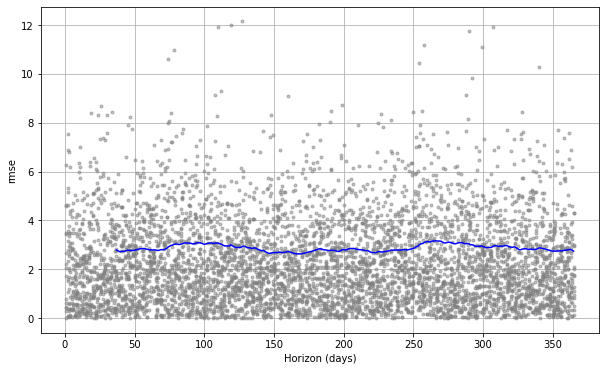

In [24]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')

### Hyperparameter Tuning

In [25]:
from itertools import product

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

rmses = []

for params in all_params:
    m = Prophet(**params).fit(df)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6284.13   1.45165e-06       4446.99      0.4086      0.4086      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       6300.44    0.00208885       5164.52   3.865e-07       0.001      222  LS failed, Hessian reset 
     198       6311.07    4.0675e-06       4109.73   6.809e-10       0.001      347  LS failed, Hessian reset 
     199       6311.08   1.34185e-06       3282.27       0.762       0.762      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       6311.09   4.27016e-07        4917.4   7.153e-11       0.001      465  LS failed, Hessian reset 
     273        6311.1   5.66428e-09       3559.64       0.494       0.494      486   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was b

  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -41.7924             0       768.166       1e-12       0.001       24   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -500.694
Iteration  1. Log joint probability =    518.867. Improved by 1019.56.
Iteration  2. Log joint probability =    942.882. Improved by 424.015.
Iteration  3. Log joint probability =    962.826. Improved by 19.944.
Iteration  4. Log joint probability =     1136.8. Improved by 173.974.
Iteration  5. Log joint probability =    1172.51. Improved by 35.7132.
Iteration  6. Log joint probability =    1201.97. Improved by 29.4576.
Iteration  7. Log joint probability =    1206.89. Improved by 4.9235.
Iteration  8. Log joint probability =    1207.19. Improved by 0.293476.
Iteration  9. Log joint probability =     1208.1. 

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1467.49   4.74611e-08       5045.55           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       1467.49   8.36274e-09       4569.96      0.7192      0.7192      130   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1814.9   1.79867e-05       5185.81       0.688       0.688      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       1815.15   4.64573e-06       5076.55   9.153e-10       0.001      194  LS failed, Hessian reset 
     136       1815.18   6.60516e-09       4969.02      0.2224      0.2224      218   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2104.69   8.79715e-05       3912.96      0.8142      0.8142      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       2106.15   0.000301271       4765.41   5.497e-08       0.001      168  LS failed, Hessian reset 
     197       2107.01   4.21098e-07       4808.73   8.666e-11       0.001      324  LS failed, Hessian reset 
     199       2107.01    1.9853e-07       4751.53           1           1      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       2107.02   7.31197e-09       4427.36      0.2377      0.2377      343   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       2414.29    0.00155391       5163.36   3.074e-07       0.001      153  LS failed, Hessian reset 
      99       2419.94   9.54965e-05       4898.07       1.408      0.1408      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       2423.13   0.000222677        4971.8   4.506e-08       0.001      239  LS failed, Hessian reset 
     199       2424.21    3.1872e-08       5161.24           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       2424.22   8.07837e-07       4740.16   1.609e-10       0.001      388  LS failed, Hessian reset 
     218       2424.22   6.50641e-09        4870.1      0.2619      0.2619      404   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       2747.48   3.78707e-05       5089.37   7.287e-09       0.001      150  LS failed, Hessian reset 
      99       2747.58   4.73944e-06        5210.3       2.715      0.2715      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       2747.59   9.74469e-09       4484.37       0.483       0.483      192   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3072.87    0.00100818       5052.22      0.1227      0.9967      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       3073.65   0.000710727       4855.74   1.423e-07       0.001      183  LS failed, Hessian reset 
     165       3075.43   3.97756e-09       3954.08      0.2348      0.2348      264   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3396.01   6.80035e-06       3905.79      0.2334      0.2334      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       3413.48   3.13267e-09       4943.25      0.1301      0.1301      230   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3690.78   9.56036e-06       5006.78      0.9515      0.9515      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       3706.79     0.0012937       4618.12   2.694e-07       0.001      189  LS failed, Hessian reset 
     199       3719.58   2.76105e-07        4719.7           1           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       3721.82   7.85745e-09       4897.87      0.6919      0.6919      417   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       4057.44   6.82495e-09       4845.11      0.3435      0.3435      114   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          4355   0.000894091       5588.64           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     190       4368.31   9.64118e-09       5063.05      0.6763      0.6763      239   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4677.58   9.78481e-06       4770.05           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       4677.74    6.4953e-09       4472.99      0.5036           1      205   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       4979.59   0.000517734       5171.91   9.507e-08       0.001      149  LS failed, Hessian reset 
      99       4982.98    0.00037897       4883.54           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       4986.42   1.47578e-06       4444.74    2.67e-10       0.001      250  LS failed, Hessian reset 
     168       4986.43   5.89379e-09       4952.53      0.5572      0.5572      280   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81        5296.1    0.00037505       4317.91   7.769e-08       0.001      135  LS failed, Hessian reset 
      99       5296.94   1.59963e-05       5314.09           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       5296.99   8.45701e-09        4418.4      0.1491      0.1491      200   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5635.12   1.26766e-07       4438.96           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       5635.12    8.6117e-09        4689.2      0.5128      0.5128      152   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       6433.23    0.00135269       4711.39   3.042e-07       0.001      166  LS failed, Hessian reset 
      99       6438.39   6.44422e-05        5147.8      0.2887           1      188   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       6439.74    0.00027379       4354.95   5.045e-08       0.001      242  LS failed, Hessian reset 
     176       6440.43   4.68664e-09       3920.36      0.3769      0.3769      319   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -41.7924             0       768.166       1e-12       0.001       24   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -560.561
Iteration  1. Log joint probability =    575.707. Improved by 1136.27.
Iteration  2. Log joint probability =    1025.32. Improved by 449.618.
Iteration  3. Log joint probability =    1228.22. Improved by 202.892.
Iteration  4. Log joint probability =    1293.49. Improved by 65.2703.
Iteration  5. Log joint probability =    1313.38. Improved by 19.8926.
Iteration  6. Log joint probability =     1340.7. Improved by 27.3159.
Iteration  7. Log joint probability =    1341.34. Improved by 0.646171.
Iteration  8. Log joint probability =    1341.88. Improved by 0.536518.
Iteration  9. Log joint probability =       134

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1623.74    3.8252e-07       5319.87     0.07042           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       1623.74    8.7932e-09       5277.87     0.06177     0.06177      124   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1901.14    0.00126065       5563.23           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1926.8    2.4304e-06       4584.61      0.5721      0.5721      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       1926.83   9.41336e-09       4808.94      0.2452      0.2452      286   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2252.96   1.48859e-07       4982.64      0.7977      0.7977      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       2252.96   2.24903e-07       5190.93   4.543e-11       0.001      193  LS failed, Hessian reset 
     135       2252.96   8.78132e-09       4492.43      0.3627           1      209   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2596.01   3.51057e-07       4996.73           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       2596.01   9.62161e-09       4979.49       0.534       0.534      145   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       2883.21   0.000213602       4930.16   4.288e-08       0.001      159  LS failed, Hessian reset 
      99       2884.58   7.93285e-06       4918.53      0.8671      0.8671      175   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       2884.66   8.27635e-09       5058.74       0.492       0.492      215   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98        3188.2    0.00188006       5525.79   3.349e-07       0.001      163  LS failed, Hessian reset 
      99       3189.08    0.00120988       4512.77           1           1      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       3199.52   8.71288e-09       4799.98      0.5451      0.5451      262   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3542.21   1.49836e-07       5117.16        0.38        0.38      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       3542.23   1.26277e-06       4658.45   2.485e-10       0.001      186  LS failed, Hessian reset 
     128       3542.23   6.67165e-09       4854.71      0.5852      0.5852      208   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3825.94   6.46358e-06       4908.62     0.06435           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       3839.73    0.00154975       4992.83   2.706e-07       0.001      260  LS failed, Hessian reset 
     199       3849.49   1.64414e-06        5247.8      0.5881      0.5881      308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232        3849.5    9.5024e-09       4950.77      0.1973      0.5626      350   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94        4175.2   2.17083e-09       4540.66      0.2106      0.2106      122   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4485.59   3.35347e-05       4755.34      0.9546      0.9546      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       4485.69   2.79065e-09       4823.65      0.2264      0.2264      163   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       4795.56   0.000188782       5052.78   3.777e-08       0.001      154  LS failed, Hessian reset 
      99       4796.41   1.05249e-05       4861.41           1           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       4796.45   9.61902e-09       5147.88      0.4066           1      212   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5103.92   7.45562e-07       4605.71      0.3936      0.3936      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       5103.98   8.99789e-10       4772.76     0.03119     0.03119      184   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      62       5421.79    0.00109542       4940.73    2.13e-07       0.001      116  LS failed, Hessian reset 
      94       5426.07   2.84145e-05       5101.72   5.452e-09       0.001      191  LS failed, Hessian reset 
      99       5426.15   1.98133e-06       4906.11      0.5333      0.5333      196   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       5426.17   5.38728e-09       4535.07       0.461       0.461      238   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5766.73   8.86306e-09       4917.38           1           1      122   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6401.58   3.46171e-07       4761.91      0.7414      0.7414      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       6401.58   9.05227e-09       5063.64      0.3466      0.3466      153   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -41.7924             0       768.166       1e-12       0.001       24   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -620.428
Iteration  1. Log joint probability =    582.686. Improved by 1203.11.
Iteration  2. Log joint probability =    895.605. Improved by 312.918.
Iteration  3. Log joint probability =    1325.62. Improved by 430.013.
Iteration  4. Log joint probability =    1325.64. Improved by 0.0260904.
Iteration  5. Log joint probability =    1341.76. Improved by 16.1159.
Iteration  6. Log joint probability =    1342.81. Improved by 1.04771.
Iteration  7. Log joint probability =    1343.21. Improved by 0.407094.
Iteration  8. Log joint probability =    1343.72. Improved by 0.506862.
Iteration  9. Log joint probability =    1343

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       1626.73    2.5966e-05       5062.14   5.518e-09       0.001      158  LS failed, Hessian reset 
      99        1626.8   2.59711e-06       4893.53      0.6063      0.6063      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153          1627   6.73929e-09       4690.96      0.1904      0.8334      237   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      53       1825.25     0.0143676       4762.88    3.19e-06       0.001      102  LS failed, Hessian reset 
      99       1900.89   0.000152094       4199.06           1           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1931.24   0.000197234       4598.61       0.501       0.501      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       1931.42   2.17718e-07       4220.34   4.298e-11       0.001      371  LS failed, Hessian reset 
     254       1931.42   7.83707e-09       4873.47      0.4025      0.4025      382   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2258.14   1.08111e-08       4594.56      0.5135      0.5135      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       2258.14    3.3154e-09       4579.17      0.3338      0.3338      123   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2586.63   1.06138e-06       5013.98           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       2586.63   5.02314e-07       5005.39       1e-10       0.001      176  LS failed, Hessian reset 
     109       2586.63   7.90202e-09       5017.96      0.1788      0.1788      187   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83       2876.09   1.55122e-05       4954.49   3.125e-09       0.001      159  LS failed, Hessian reset 
      99       2876.14   1.71496e-07       4362.05      0.3216      0.3216      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       2876.14   6.93567e-09       4876.75      0.3749      0.3749      195   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3172.51   7.21502e-07        4830.5      0.2844      0.2844      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       3195.85   0.000558815       4737.17   1.145e-07       0.001      199  LS failed, Hessian reset 
     199       3210.02    7.8395e-08       4289.56      0.5253      0.5253      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       3210.05   5.68407e-07       4652.44   1.223e-10       0.001      401  LS failed, Hessian reset 
     259       3210.05   8.01826e-09       4815.09      0.2581      0.2581      413   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3527.78   3.36795e-08       4272.96      0.9331      0.9331      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       3527.78   4.25786e-09       4879.04       0.533       0.533      134   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       3805.76   0.000633977       4886.49   1.366e-07       0.001      127  LS failed, Hessian reset 
      99       3810.03   3.46041e-06       5022.34           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       3831.14    0.00528488       4370.74   9.829e-07       0.001      301  LS failed, Hessian reset 
     199       3850.45   5.79081e-05       4348.02      0.3092           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3853.42   2.78794e-06       5090.94           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       3853.45   5.83309e-09       5005.19      0.2819      0.2819      493   
Optimization terminate

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4144.52    5.4925e-08       4337.18           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       4144.52   6.31018e-09       4792.24      0.2159      0.2159      145   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      67       4442.99    0.00870431        5129.2   1.613e-06       0.001      124  LS failed, Hessian reset 
      99       4468.48   1.65576e-06        5084.7       0.251       0.251      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       4478.64    0.00108523       4977.38   2.185e-07       0.001      237  LS failed, Hessian reset 
     163       4484.11   6.04953e-09       4899.66      0.2105      0.2105      301   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4797.36   7.62616e-08       4552.11      0.5295     0.05295      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       4797.36    3.8655e-09       4408.24      0.6603      0.6603      144   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       5105.33   0.000434825       4802.36   7.925e-08       0.001      140  LS failed, Hessian reset 
      99       5106.87   5.67548e-06        5118.6           1           1      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       5106.89   8.16748e-09       4769.53      0.4402      0.4402      203   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5424.12   6.09127e-06       5544.24      0.3549           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       5424.16   5.89184e-09       4293.26      0.2546      0.2546      178   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5765.19   4.87488e-08       4644.99      0.2291      0.2291      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120        5765.6   5.11459e-05       4696.05    9.56e-09       0.001      195  LS failed, Hessian reset 
     173       5765.78   2.15464e-07        4232.4   4.415e-11       0.001      300  LS failed, Hessian reset 
     183       5765.78   9.19765e-09       4400.39      0.5102      0.5102      311   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       6427.42    0.00232882       5293.81   4.434e-07       0.001      151  LS failed, Hessian reset 
      99       6437.57   0.000406005       4988.81           1           1      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       6438.55   6.35971e-09       4681.03      0.4386      0.4386      242   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       1      -41.7924             0       768.166       1e-12       0.001       24   
Optimization terminated with error: 
  Line search failed to achieve a sufficient decrease, no more progress can be made

Initial log joint probability = -680.295
Iteration  1. Log joint probability =    582.633. Improved by 1262.93.
Iteration  2. Log joint probability =    889.229. Improved by 306.595.
Iteration  3. Log joint probability =    1322.96. Improved by 433.734.
Iteration  4. Log joint probability =    1325.19. Improved by 2.23084.
Iteration  5. Log joint probability =    1341.79. Improved by 16.5999.
Iteration  6. Log joint probability =    1342.83. Improved by 1.03966.
Iteration  7. Log joint probability =    1343.21. Improved by 0.381356.
Iteration  8. Log joint probability =    1343.74. Improved by 0.528417.
Iteration  9. Log joint probability =    1343.9

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1626.74   1.90981e-07       5126.97      0.6958      0.6958      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       1626.74   8.63438e-08       4597.15   1.566e-11       0.001      189  LS failed, Hessian reset 
     126       1626.74   9.25405e-09       4842.36      0.4783      0.4783      194   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1920.38   5.56076e-05       4999.94      0.4675      0.4675      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       1943.19   6.23374e-09       4921.87      0.1524      0.1524      211   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       2251.95    5.2402e-05       4460.97   9.834e-09       0.001      155  LS failed, Hessian reset 
      99       2252.06   5.80164e-06       4286.81      0.5161      0.5161      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       2252.14   6.80064e-07       4779.94   1.657e-10       0.001      257  LS failed, Hessian reset 
     158       2252.14   5.81447e-09       4125.56      0.4493      0.4493      285   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2589.43   4.14078e-08       4979.95      0.8395      0.8395      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       2589.43   8.11979e-09       5124.86      0.5938      0.5938      133   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2878.01   1.45832e-08       5029.22      0.2952           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       2878.01    6.4596e-09       4945.67      0.7527      0.7527      134   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3178.05   2.77146e-07        5092.5           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       3178.05   5.32491e-09       4979.23      0.4841      0.4841      143   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       3519.86   7.61638e-05       4952.69   1.537e-08       0.001      155  LS failed, Hessian reset 
      99       3520.11   4.06682e-06       4914.14      0.5267      0.5267      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       3520.17   7.39917e-09       4479.18     0.06619     0.06619      198   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       3801.01    0.00129196       5184.44   3.175e-07       0.001      130  LS failed, Hessian reset 
      99       3807.52   5.12632e-06       4816.14      0.3028      0.3028      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       3827.66    0.00511009       5294.07   7.977e-07       0.001      275  LS failed, Hessian reset 
     199       3853.77   4.11346e-07       4128.22      0.2696           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       3853.77   8.01932e-09       4850.11      0.2897      0.2897      351   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4145.07   2.60189e-07       5146.43           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       4145.07   5.33245e-07       5003.85    1.08e-10       0.001      166  LS failed, Hessian reset 
     126       4145.08   5.06349e-09       4430.37      0.4836      0.4836      187   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4475.84     0.0001085       5097.95      0.6952      0.6952      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       4476.33   6.94545e-09       5120.57      0.1912      0.1912      177   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4796.62   5.80364e-07       4604.87      0.2003           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       4796.63   8.70751e-09       4998.47      0.3694      0.3694      143   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65       5104.54   0.000540167       4528.64   1.277e-07       0.001      126  LS failed, Hessian reset 
      99       5107.63   1.60852e-06       4606.11           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       5107.66   7.86134e-09       4626.58    0.002561           1      192   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5425.68   1.10957e-05       4281.32      0.6863      0.6863      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5425.74   3.19399e-09       4894.28      0.2168      0.2168      181   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5767.67   4.70037e-07       5058.48      0.8405      0.8405      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       5767.67   9.51656e-09       5324.62      0.3185      0.3185      136   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       6320.48    0.00112688       578.488   3.578e-06       0.001      149  LS failed, Hessian reset 
      99       6320.66   9.47742e-05       250.123      0.7261           1      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       6320.68   3.95213e-05       300.134   1.353e-07       0.001      225  LS failed, Hessian reset 
     134       6320.69    4.9711e-06       225.482   1.919e-08       0.001      305  LS failed, Hessian reset 
     149       6320.69     1.739e-07       265.715       1.252      0.5019      329   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1211.99   3.12026e-05       424.199      0.3407      0.3407      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       1212.06   9.04497e-09       460.644      0.2229      0.2229      207   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1498.68     0.0004457       342.979           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       1498.79   5.29772e-07       476.136   1.188e-09       0.001      264  LS failed, Hessian reset 
     192       1498.79   1.45751e-08       260.064           1           1      291   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1816.5    0.00026148       379.239      0.4383           1      144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1816.75   1.70696e-06       255.254      0.3469           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1816.87   1.06973e-06       371.042      0.7456      0.7456      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       1816.88    2.9576e-06       338.946   7.549e-09       0.001      456  LS failed, Hessian reset 
     355       1816.88   2.31962e-09       395.241     0.06779    0.006779      522   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2147.73   9.29769e-05       300.856           1           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       2147.86   0.000186794       285.892   5.703e-07       0.001      182  LS failed, Hessian reset 
     113       2147.87   5.07369e-06       264.088    1.99e-08       0.001      227  LS failed, Hessian reset 
     181       2147.91   9.99533e-09       385.196       0.101       0.101      330   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2468.59    0.00200883       440.665          10           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       2468.96   0.000693446       411.733   1.841e-06       0.001      183  LS failed, Hessian reset 
     156       2469.11   2.46125e-05       350.157   6.278e-08       0.001      271  LS failed, Hessian reset 
     199       2469.12    1.8324e-06       372.251           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       2469.58   0.000107729       399.857   2.135e-07       0.001      411  LS failed, Hessian reset 
     299       2469.63   2.51564e-06       466.255      0.5276      0.5276      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2754.68     0.0114204       494.093           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       2754.86    0.00339056       447.123    6.91e-06       0.001      151  LS failed, Hessian reset 
     152       2755.38   2.01257e-05       293.729   6.805e-08       0.001      260  LS failed, Hessian reset 
     199        2755.4   1.69957e-07        362.14      0.4225      0.4225      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214        2755.4   9.25524e-06        322.76   2.174e-08       0.001      381  LS failed, Hessian reset 
     242        2755.4   1.40348e-09       395.437      0.0385      0.0385      419   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3086.39   3.57055e-06       409.664      0.4583      0.4583      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3086.64   1.42024e-05       297.081           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       3086.64   1.65318e-07       457.436    4.38e-10       0.001      351  LS failed, Hessian reset 
     241       3086.64   2.54697e-08       272.461       0.225           1      354   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3419.83   8.57422e-06       376.023     0.09341     0.09341      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       3420.01   4.56527e-05       424.312   1.031e-07       0.001      253  LS failed, Hessian reset 
     199       3420.02   1.90059e-05       436.736      0.9898      0.9898      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       3420.03   2.67455e-07       330.384           1           1      352   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3738.39    0.00359854       449.115           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       3738.41   0.000809452       411.054   1.802e-06       0.001      171  LS failed, Hessian reset 
     163       3738.77   2.03405e-05       384.686   4.596e-08       0.001      302  LS failed, Hessian reset 
     199       3738.77   1.97225e-07       326.775           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       3738.77   8.58331e-09       282.167    0.006839           1      369   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4056.62    0.00051476       480.781           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       4057.56   0.000369402       433.632   7.905e-07       0.001      225  LS failed, Hessian reset 
     199       4057.79   9.13243e-05       318.031           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       4057.82   2.58124e-06       411.875   6.858e-09       0.001      421  LS failed, Hessian reset 
     284       4057.82    2.7232e-08       311.262      0.2041      0.2041      437   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4368.11   0.000588503       302.136           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       4368.65   8.24116e-05       309.931    1.77e-07       0.001      239  LS failed, Hessian reset 
     199       4368.68   2.94209e-07       360.092      0.6116      0.6116      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       4368.68   7.39983e-08       288.413      0.2109           1      334   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4684.04   0.000127071       339.847           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       4684.34   0.000284856        262.97   1.102e-06       0.001      195  LS failed, Hessian reset 
     130       4684.36   2.13124e-06       197.682   9.666e-09       0.001      262  LS failed, Hessian reset 
     136       4684.36   2.03718e-07       115.654   1.253e-09       0.001      310  LS failed, Hessian reset 
     137       4684.36   3.13183e-08       197.675      0.2679           1      312   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4997.06     0.0015216       385.579     0.04705           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       4997.14   0.000889879       365.523   2.308e-06       0.001      202  LS failed, Hessian reset 
     159       4997.25    2.7754e-06       114.263    1.11e-08       0.001      340  LS failed, Hessian reset 
     184       4997.25   2.55195e-07       167.323     0.06228           1      387   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5313.37   0.000602154       248.259           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       5314.42   0.000191727       237.455   6.937e-07       0.001      204  LS failed, Hessian reset 
     147       5314.45   2.72631e-07       199.541   1.278e-09       0.001      294  LS failed, Hessian reset 
     149       5314.45   9.66748e-08       200.774           1           1      296   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       5646.57   0.000173571       184.713   6.632e-07       0.001      157  LS failed, Hessian reset 
      99       5646.58   1.68522e-05       185.112      0.3659           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       5647.18     0.0014801       254.717   3.616e-06       0.001      288  LS failed, Hessian reset 
     199       5647.37   2.15161e-05       419.002    0.006866           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     259       5647.52   4.17174e-06       301.071   1.501e-08       0.001      497  LS failed, Hessian reset 
     265       5647.52   8.53746e-07       266.019   4.754e-09       0.001      543  LS failed, Hessian reset 
     274       5647.52   1.28176e-07       237.084   5.849e-10   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6443.9   3.33307e-05       340.322       0.265       0.265      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       6445.41   0.000604761        493.63    1.43e-06       0.001      216  LS failed, Hessian reset 
     199       6445.62   2.94049e-05       298.484      0.6004      0.6004      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       6445.83   4.17399e-06       277.103   1.538e-08       0.001      422  LS failed, Hessian reset 
     279       6445.83   5.38236e-08       258.669      0.2758           1      459   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  0%|          | 0/15 [00:00<?, ?it/s]

Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       1341.87   0.000258038       521.649   5.563e-07       0.001      168  LS failed, Hessian reset 
      99       1342.01   4.34764e-05       487.913      0.8995      0.8995      179   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       1342.19   2.28304e-05        468.87   4.511e-08       0.001      308  LS failed, Hessian reset 
     199        1342.2   1.23523e-07       485.175      0.6852      0.6852      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       1342.21   5.48463e-06       501.343    1.05e-08       0.001      399  LS failed, Hessian reset 
     245       1342.21    5.9345e-09       464.685      0.5362      0.5362      437   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1634.24   5.93481e-05       378.659           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       1634.34   2.18883e-07       471.577   4.221e-10       0.001      286  LS failed, Hessian reset 
     197       1634.34   4.38313e-09       388.814      0.1112      0.1112      292   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1953.05   4.15542e-05       332.453      0.5064      0.5064      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       1953.14   2.18735e-05       308.593   1.211e-07       0.001      228  LS failed, Hessian reset 
     199       1953.19   1.60052e-07        314.09      0.9925      0.9925      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       1953.19   2.36633e-08       315.661      0.4943      0.4943      369   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2278.72   4.80508e-05       368.446      0.4103           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       2278.77   2.75974e-05       474.192   5.359e-08       0.001      215  LS failed, Hessian reset 
     174       2278.79    4.0178e-06       381.065   9.038e-09       0.001      312  LS failed, Hessian reset 
     199       2278.79   4.89612e-07       436.894           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       2278.79   1.32139e-08       270.917      0.2823      0.2823      368   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2597.61   0.000237041        531.71   5.989e-07       0.001      165  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       2597.75   2.14423e-08       272.538       0.725       0.725      289   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2884.03   0.000244267       277.652      0.8655      0.8655      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       2884.29   0.000239778       446.704    5.06e-07       0.001      198  LS failed, Hessian reset 
     199        2884.4   1.64451e-07       297.562      0.7264    0.007264      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       2884.46   0.000128653       507.533   3.688e-07       0.001      381  LS failed, Hessian reset 
     299        2884.5   5.99613e-07       467.969      0.1085           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313        2884.5   4.32837e-08        240.15      0.5001           1      477   
Optimization terminat

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3215.08    0.00239036       427.815           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       3215.12   0.000248182       496.187   6.328e-07       0.001      174  LS failed, Hessian reset 
     192       3215.19    4.0778e-07       348.669   1.031e-09       0.001      336  LS failed, Hessian reset 
     199       3215.19   2.56145e-08       307.502       0.513       0.513      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       3215.19   1.68944e-08       322.584      0.2671           1      346   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3544.37   5.55025e-05        441.95       0.196           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       3544.76   0.000164041        351.05   4.471e-07       0.001      232  LS failed, Hessian reset 
     199       3544.79   6.31181e-08        331.27     0.06948           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       3544.79   1.37516e-05       428.071   3.733e-08       0.001      425  LS failed, Hessian reset 
     269        3544.8   2.83708e-08       280.755      0.2983           1      451   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3862.17   0.000213934       416.614     0.03949           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       3862.28   9.13285e-05       402.463   2.125e-07       0.001      204  LS failed, Hessian reset 
     166       3862.31   1.37758e-06       419.709   3.465e-09       0.001      298  LS failed, Hessian reset 
     177       3862.31   1.53662e-08       363.876      0.2261           1      315   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4176.41   2.00557e-05       333.047      0.4799      0.4799      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       4176.59   8.85485e-05       430.976   2.096e-07       0.001      234  LS failed, Hessian reset 
     180       4176.63   4.21148e-08       409.284      0.3623           1      282   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4485.47   0.000770178        421.28           1           1      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       4486.03   3.24261e-05       286.448   8.776e-08       0.001      261  LS failed, Hessian reset 
     192       4486.04   9.11521e-08       357.872      0.2666           1      314   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4801.74   0.000745081       298.451     0.05224           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106        4801.8   0.000159233       203.097   5.746e-07       0.001      190  LS failed, Hessian reset 
     170       4801.97    8.9685e-06       176.084   3.365e-08       0.001      332  LS failed, Hessian reset 
     184       4801.97   6.18583e-06       305.566   2.229e-08       0.001      391  LS failed, Hessian reset 
     194       4801.97   8.45927e-09        228.06     0.01134           1      409   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5113.47   0.000217563       195.787      0.3444      0.3444      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       5113.77   0.000112346       216.059   5.518e-07       0.001      210  LS failed, Hessian reset 
     157       5114.17   6.70769e-06       187.538   2.766e-08       0.001      299  LS failed, Hessian reset 
     186       5114.19   3.81408e-07       156.455   1.853e-09       0.001      386  LS failed, Hessian reset 
     199       5114.19   1.01282e-06       239.729       2.388     0.02388      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208        5114.2   7.21961e-07        237.95   2.671e-09       0.001      464  LS failed, Hessian reset 
     213        5114.2   5.10443e-08       192.942      0.3156   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       5433.52   0.000174202        285.62   6.765e-07       0.001      168  LS failed, Hessian reset 
      99       5433.56   5.01957e-07       201.241      0.0156           1      189   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       5433.81   6.26544e-05       170.567   5.074e-07       0.001      294  LS failed, Hessian reset 
     139       5433.82   1.16477e-05       209.964   4.766e-08       0.001      345  LS failed, Hessian reset 
     145       5433.82   2.56115e-05       253.127   1.091e-07       0.001      389  LS failed, Hessian reset 
     155       5433.82   2.17383e-07       114.911   9.805e-10       0.001      451  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5768.01   0.000731711        527.05      0.5697      0.5697      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       5769.74    0.00293879       425.617   7.179e-06       0.001      228  LS failed, Hessian reset 
     167       5770.09   2.04153e-05       211.858   1.081e-07       0.001      324  LS failed, Hessian reset 
     175       5770.09   5.81683e-07        251.41   2.677e-09       0.001      384  LS failed, Hessian reset 
     191       5770.09   1.20897e-07       260.509      0.3317           1      411   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60        6441.2    0.00201336        909.96   5.991e-06       0.001      115  LS failed, Hessian reset 
      99        6444.1   8.65388e-05       396.484       0.335           1      178   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       6444.71   0.000892255       436.903   2.258e-06       0.001      235  LS failed, Hessian reset 
     152          6445   1.84891e-08       240.052     0.04015           1      293   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  0%|          | 0/15 [00:00<?, ?it/s]

Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1342.98    0.00288299        471.62           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       1343.05   0.000318896       479.973   6.542e-07       0.001      157  LS failed, Hessian reset 
     152       1343.24   1.25109e-05       474.253   2.338e-08       0.001      260  LS failed, Hessian reset 
     190       1343.24   8.99297e-09       508.357      0.4129      0.4129      304   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1635.62   7.20308e-05        483.32      0.3291           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       1635.93   0.000221255       473.696   5.048e-07       0.001      212  LS failed, Hessian reset 
     175       1636.02   9.37936e-07       459.286   2.332e-09       0.001      305  LS failed, Hessian reset 
     196       1636.02   8.85479e-09       419.414      0.2104           1      331   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      69       1954.25    0.00109539       431.521   2.502e-06       0.001      124  LS failed, Hessian reset 
      99       1954.54   2.31052e-05       358.523           1           1      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       1954.54   1.19317e-05       289.218   3.227e-08       0.001      205  LS failed, Hessian reset 
     121       1954.54   3.49149e-08       258.097   1.343e-10       0.001      269  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2279.95   3.50841e-05       491.705      0.5601      0.5601      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       2280.35   1.00097e-05       404.682   2.152e-08       0.001      251  LS failed, Hessian reset 
     184       2280.35   9.60809e-09       340.805      0.1981      0.1981      289   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2599.28   3.68441e-06       290.838      0.8801      0.8801      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     125       2599.28   1.09519e-06       378.388    2.66e-09       0.001      206  LS failed, Hessian reset 
     147       2599.28   1.16996e-08       379.335      0.2578      0.9586      238   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2885.35   0.000282759       387.907      0.4005      0.4005      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       2885.56   0.000598156       436.613   1.553e-06       0.001      178  LS failed, Hessian reset 
     173       2885.79   5.51152e-05       309.528   1.224e-07       0.001      304  LS failed, Hessian reset 
     199        2885.8   8.28946e-08       344.349      0.2912      0.2912      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233        2885.8   1.20168e-06       344.122   2.888e-09       0.001      428  LS failed, Hessian reset 
     244        2885.8   9.14369e-09       369.016      0.1933      0.1933      443   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3216.03   0.000193633       547.439           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       3216.63   1.75178e-08       348.076       0.307      0.7971      242   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3545.65   2.07623e-05       420.257      0.4785      0.4785      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       3545.69   0.000261195       416.232   7.014e-07       0.001      178  LS failed, Hessian reset 
     162       3545.79   8.56311e-05       325.858   3.148e-07       0.001      291  LS failed, Hessian reset 
     199       3545.83   3.74617e-07       304.472     0.05895           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       3545.83   1.05526e-05       358.713   2.269e-08       0.001      395  LS failed, Hessian reset 
     264       3545.84   1.19639e-05       379.088   3.788e-08       0.001      506  LS failed, Hessian reset 
     299       3545.84   1.04023e-06       381.314           1   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3863.19   2.06189e-05       458.429      0.6614      0.6614      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       3863.53   7.74647e-05        432.56   1.978e-07       0.001      253  LS failed, Hessian reset 
     199       3863.55   1.65963e-06       437.202      0.3496           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       3863.56   4.68887e-07       399.791      0.5143      0.5143      384   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4177.32   0.000693319       421.272           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       4177.72    0.00028976       392.322   7.026e-07       0.001      201  LS failed, Hessian reset 
     185       4177.81   2.70569e-06       306.773   8.005e-09       0.001      314  LS failed, Hessian reset 
     199       4177.81   1.11519e-07       276.694      0.3735           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       4177.81    1.0063e-08       375.256      0.0493      0.0493      348   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4486.74    0.00217277       551.731           1           1      144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       4487.18    0.00078912       443.482   2.274e-06       0.001      196  LS failed, Hessian reset 
     169       4487.33   2.68917e-06       385.857   1.015e-08       0.001      319  LS failed, Hessian reset 
     199       4487.34   3.03426e-06       333.571           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       4487.34   2.92224e-06        247.42   1.094e-08       0.001      400  LS failed, Hessian reset 
     216       4487.34   8.75434e-08       255.636      0.2377           1      423   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4803.12   0.000500951       300.351      0.2253       0.392      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       4803.19   8.07175e-05       246.766   3.704e-07       0.001      209  LS failed, Hessian reset 
     134        4803.2   3.15761e-07       190.676   1.552e-09       0.001      276  LS failed, Hessian reset 
     135        4803.2   2.01478e-07       163.412           1           1      277   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       5114.22    0.00217142       568.566    6.91e-06       0.001      156  LS failed, Hessian reset 
      89       5114.65    0.00130554       224.414   7.086e-06       0.001      219  LS failed, Hessian reset 
      99       5114.71   1.36176e-05       116.996      0.8526      0.8526      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       5114.71   8.23138e-07       115.906   4.735e-09       0.001      278  LS failed, Hessian reset 
     107       5114.71   5.07247e-08       160.247   2.569e-10       0.001      329  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5434.85   0.000772024       251.382       0.187           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     100       5434.87   0.000280148       194.184   1.114e-06       0.001      172  LS failed, Hessian reset 
     135       5434.98   2.79464e-05       214.402   8.619e-08       0.001      272  LS failed, Hessian reset 
     191       5435.02    2.2549e-07       229.593   1.346e-09       0.001      412  LS failed, Hessian reset 
     193       5435.02   6.37458e-08       176.514      0.3513           1      415   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5771.53   0.000912512       245.836           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       5771.76   0.000404561       310.085    9.82e-07       0.001      187  LS failed, Hessian reset 
     138       5771.89   2.09892e-05       246.467   8.665e-08       0.001      270  LS failed, Hessian reset 
     187       5771.93   2.63392e-07       229.555       1.624      0.1624      339   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6445.24   1.72937e-05        274.74      0.4073      0.4073      144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       6446.37   0.000838407       572.275   1.715e-06       0.001      285  LS failed, Hessian reset 
     199       6446.83    1.1736e-07       309.335      0.4652      0.9967      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       6446.83   6.33971e-09       267.029     0.05662     0.05662      356   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       1341.67   0.000686754       484.068   1.452e-06       0.001      130  LS failed, Hessian reset 
      99       1342.02   0.000420462       428.965           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       1343.97   8.51471e-09       510.184      0.5148      0.5148      241   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       1635.75   0.000564649        345.24   1.109e-06       0.001      153  LS failed, Hessian reset 
      99       1635.84   7.11218e-05       413.078      0.7477      0.4854      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     169       1635.91   3.37479e-05       395.511    7.48e-08       0.001      288  LS failed, Hessian reset 
     199       1635.91   3.76448e-07       357.563           1           1      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       1635.91   1.01094e-08       382.613      0.6604      0.6604      365   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      68       1954.37   0.000698611        352.34   1.646e-06       0.001      129  LS failed, Hessian reset 
      99       1954.53    7.3309e-06       368.581      0.5769      0.5769      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       1954.54   1.80488e-05       367.129   4.189e-08       0.001      225  LS failed, Hessian reset 
     153       1954.55   2.65594e-06       399.023   5.779e-09       0.001      320  LS failed, Hessian reset 
     185       1954.55   2.23779e-08       292.036           1           1      367   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2280.4   5.73445e-05        312.15           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2280.6   1.71284e-05       498.949           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       2280.99   3.08213e-05       435.491   6.326e-08       0.001      375  LS failed, Hessian reset 
     299       2281.01   6.53098e-09       509.045     0.05534     0.05534      431   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      97       2599.38   0.000183894        419.45   3.775e-07       0.001      173  LS failed, Hessian reset 
      99        2599.4   5.93112e-05       423.947           1           1      175   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       2599.43   2.35388e-06        327.59   5.241e-09       0.001      289  LS failed, Hessian reset 
     170       2599.43    1.6451e-08       347.074      0.4296      0.4296      307   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2883.04   0.000197539       411.146           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       2885.59   6.06354e-05       398.037   1.453e-07       0.001      267  LS failed, Hessian reset 
     199       2885.62   2.71733e-06       446.314      0.5477      0.5477      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       2885.67    2.5568e-08       365.557           1           1      390   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3216.36   0.000642567       401.882      0.3786           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       3216.44   0.000380571       339.864   8.712e-07       0.001      162  LS failed, Hessian reset 
     199       3216.56   1.06563e-05        427.17      0.3641           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       3216.56   4.91693e-06       364.589   1.224e-08       0.001      338  LS failed, Hessian reset 
     241       3216.56   4.11965e-08       362.958      0.2711           1      380   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3545.93   4.71812e-05       248.564      0.4841      0.4841      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       3546.04   0.000119452       352.556   2.923e-07       0.001      176  LS failed, Hessian reset 
     156       3546.09   2.17244e-06       220.614   1.044e-08       0.001      279  LS failed, Hessian reset 
     161       3546.09   2.96305e-08       201.863     0.09923      0.3233      287   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3862.86   0.000102652       362.933           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       3863.23   1.08034e-05       445.731   2.123e-08       0.001      252  LS failed, Hessian reset 
     196       3863.23   2.60635e-08       401.584      0.3743           1      294   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4176.37    0.00129811       526.973   2.937e-06       0.001      158  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       4177.01   3.15516e-06        283.15   8.514e-09       0.001      297  LS failed, Hessian reset 
     199       4177.02   3.27769e-07       348.861           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       4177.02   3.63819e-09       339.718    0.001656           1      375   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       4487.12    0.00117558       404.561   2.333e-06       0.001      155  LS failed, Hessian reset 
      99       4487.26   4.12647e-05       172.572      0.6176      0.6176      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4487.45   0.000125054       300.117           1           1      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       4487.92   0.000710197       286.603   1.599e-06       0.001      437  LS failed, Hessian reset 
     299       4488.14   6.63586e-06       357.113      0.2955           1      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       4488.14   2.21213e-06       329.734   7.459e-09       0.001      607  LS failed, Hessian reset

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4802.96   6.60175e-05       217.583      0.6088      0.6088      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       4803.05   1.14327e-08       219.789    0.004878           1      224   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5114.99    0.00172778       354.966      0.5658      0.5658      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       5115.17   0.000534972       204.978   1.834e-06       0.001      197  LS failed, Hessian reset 
     116       5115.23   2.52876e-06       131.115    1.12e-08       0.001      257  LS failed, Hessian reset 
     123       5115.23   2.30817e-07       164.282    9.36e-10       0.001      311  LS failed, Hessian reset 
     124       5115.23    1.5919e-08       130.931      0.1046           1      314   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5434.45   0.000356313       248.289       4.693     0.04693      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       5435.01   0.000112765        263.68   5.761e-07       0.001      198  LS failed, Hessian reset 
     151       5435.03    3.9607e-07       148.003   1.754e-09       0.001      293  LS failed, Hessian reset 
     165       5435.03   3.37213e-07       214.686    1.28e-09       0.001      369  LS failed, Hessian reset 
     166       5435.03   1.11319e-07       250.418           1           1      370   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       5771.43    0.00105091       486.246    2.63e-06       0.001      163  LS failed, Hessian reset 
      99       5771.53   0.000622208       310.848           1           1      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       5771.66    1.2918e-05       279.572   5.487e-08       0.001      240  LS failed, Hessian reset 
     160       5771.67   2.84157e-08       281.363     0.09443     0.09443      307   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6345.22    0.00541964       57.8008           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       6345.48   0.000159316       79.6198   1.299e-06       0.001      188  LS failed, Hessian reset 
     166       6346.51   0.000276165       92.4799   6.547e-06       0.001      276  LS failed, Hessian reset 
     199       6346.59   2.65572e-06       30.2954      0.1989           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       6346.62   0.000113551       37.3443   3.409e-06       0.001      391  LS failed, Hessian reset 
     283       6346.73   0.000112539       64.8352   1.872e-06       0.001      508  LS failed, Hessian reset 
     299       6346.82   0.000328072       30.4506           1    

  0%|          | 0/15 [00:00<?, ?it/s]

Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1249.86    0.00871319       78.6556           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1251.92    0.00535156       29.3046           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       1252.25   0.000927584       63.7153    2.94e-05       0.001      360  LS failed, Hessian reset 
     258       1253.54    0.00045066        62.812   9.164e-06       0.001      453  LS failed, Hessian reset 
     299       1253.63    0.00012111        31.481           1           1      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335       1253.63   1.97594e-05       35.3241   5.734e-07       0.001      615  LS failed, Hessian rese

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1511.53    0.00878232       42.6737      0.3293           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1517.91   0.000571239       70.7612   7.377e-06       0.001      277  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     282        1518.2   8.22407e-06       33.8765   2.296e-07       0.001      426  LS failed, Hessian reset 
     293        1518.2   1.28402e-07       28.7114      0.3071           1      441   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1833.2    0.00764019       44.3161      0.4112      0.4112      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     198       1833.81   1.39048e-07       26.9451      0.2953      0.2953      249   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2159.96    0.00111619       36.3424      0.9317      0.9317      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2160.92    0.00474469       67.7111           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2161.61   5.96895e-05       33.6848           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     390       2161.77   1.87008e-06       39.5964   5.089e-08       0.001      546  LS failed, Hessian reset 
     396       2161.77   7.47094e-08       24.3948     0.04866           1      554   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2481.77    0.00192236       36.8028      0.1729           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       2481.94    0.00129579       101.058   2.621e-05       0.001      214  LS failed, Hessian reset 
     199       2482.14    0.00592183       54.3471      0.9864      0.9864      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       2482.56    0.00136947       43.1219   2.835e-05       0.001      385  LS failed, Hessian reset 
     291       2482.64   3.17773e-05       42.4666    8.47e-07       0.001      481  LS failed, Hessian reset 
     299       2482.64    3.5344e-06       28.1396      0.4236           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2768.99    0.00203084       49.4543           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       2769.32   0.000209274       48.0742   4.023e-06       0.001      225  LS failed, Hessian reset 
     184       2769.33   1.75022e-07       32.8156      0.2658      0.2658      282   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3099.51   0.000839847       36.6019           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       3099.63    0.00114763       85.7179   3.048e-05       0.001      203  LS failed, Hessian reset 
     199       3099.68   3.44713e-05       38.6788       2.901      0.2901      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       3099.69     8.557e-05       36.6363   2.157e-06       0.001      363  LS failed, Hessian reset 
     243       3099.69    2.0232e-07       31.9426      0.2224      0.2224      403   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3434.25   0.000327897       37.0619      0.6807      0.6807      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       3434.58    0.00170009       125.397    4.17e-05       0.001      191  LS failed, Hessian reset 
     189       3434.69   0.000325433       30.8436   6.904e-06       0.001      311  LS failed, Hessian reset 
     199        3434.7   3.70296e-05       33.6671           1           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     259       3434.72   3.31271e-05        35.519   8.355e-07       0.001      433  LS failed, Hessian reset 
     299       3434.72   0.000128518       39.0829           1           1      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3751.21    0.00209756       39.3984      0.9047      0.9047      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3751.65    0.00195853       52.1714      0.3847      0.3847      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       3751.86   0.000166397       54.9711    3.41e-06       0.001      310  LS failed, Hessian reset 
     271       3751.99   6.09042e-05       37.1218   1.134e-06       0.001      442  LS failed, Hessian reset 
     299       3751.99    2.9241e-07       28.3514      0.1786      0.7946      479   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       4070.41   0.000197334        60.908   2.038e-06       0.001      139  LS failed, Hessian reset 
      90       4070.64   0.000146793       41.6981   1.652e-06       0.001      195  LS failed, Hessian reset 
      99       4070.68   0.000433849       38.4302           1           1      209   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       4070.96   0.000135509       47.8881   2.335e-06       0.001      348  LS failed, Hessian reset 
     199       4071.08   6.34048e-05       35.5964      0.4047      0.4047      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       4071.08   6.69048e-07       25.8272           1           1      445   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4381.76   0.000232718       32.5175           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       4382.31   0.000253288        82.455   5.281e-06       0.001      217  LS failed, Hessian reset 
     169       4382.53   0.000283893       89.3591   5.868e-06       0.001      294  LS failed, Hessian reset 
     198       4382.54   5.82577e-07       39.7815           1           1      332   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4708.95    0.00687977       154.688           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       4709.54   0.000171217       63.4933   4.288e-06       0.001      204  LS failed, Hessian reset 
     199       4710.03   0.000882148        54.224      0.7308      0.7308      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       4710.09    0.00025376       69.9893   5.408e-06       0.001      335  LS failed, Hessian reset 
     295       4710.63   0.000531424       33.3484   1.563e-05       0.001      482  LS failed, Hessian reset 
     299       4710.66   0.000460371       40.0005           1           1      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5024.59    0.00127632        54.059      0.2638           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       5024.97   0.000133293       58.3292   1.971e-06       0.001      211  LS failed, Hessian reset 
     199       5025.22   3.67078e-05       49.4352      0.5277      0.5277      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       5025.42   0.000341138       110.389   4.921e-06       0.001      370  LS failed, Hessian reset 
     260       5025.57     8.321e-05       46.1755   2.214e-06       0.001      449  LS failed, Hessian reset 
     292       5025.61   0.000208533       39.5171   5.386e-06       0.001      530  LS failed, Hessian reset 
     299       5025.61   8.69663e-07       30.0355     0.05554   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5338.24     0.0191464       112.777       0.219           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       5338.29   0.000586894       154.771   1.239e-05       0.001      164  LS failed, Hessian reset 
     165          5339   0.000803534       117.849   1.991e-05       0.001      303  LS failed, Hessian reset 
     199       5339.23   3.82461e-06       32.6813      0.2092           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     235       5339.26   0.000127145       42.9592   3.449e-06       0.001      444  LS failed, Hessian reset 
     279       5339.27   4.62504e-05       35.8421   1.565e-06       0.001      548  LS failed, Hessian reset 
     299       5339.27   7.55468e-07       31.0489      0.1962   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5671.95    0.00246283       90.9391           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5673.9    0.00423276       72.8575           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5674.68    0.00124364       39.1369      0.2328           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       5674.92   0.000276535       34.1608   1.448e-05       0.001      520  LS failed, Hessian reset 
     399       5674.94   8.06614e-05       28.2311           1           1      541   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5675.03   0.000137195    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6467.65     0.0156097       62.8615           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6469.02   0.000163107       38.5477           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       6469.31   0.000667723       158.492   1.212e-05       0.001      374  LS failed, Hessian reset 
     299       6469.45   9.13497e-05       23.7475      0.8112      0.8112      424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       6469.48   7.36897e-05       37.4101    2.05e-06       0.001      487  LS failed, Hessian reset 
     353       6469.48   7.50635e-07       25.5168       1.273      0.4836      533   
Optimization terminate

  0%|          | 0/15 [00:00<?, ?it/s]

Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       1342.36   0.000241871       31.9853   5.821e-06       0.001      139  LS failed, Hessian reset 
      99       1342.36   2.53518e-06       30.8072      0.3384      0.3384      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       1342.37   2.17296e-05       43.4752   4.913e-07       0.001      240  LS failed, Hessian reset 
     139       1342.37   8.37942e-08       34.5166      0.2063      0.2063      263   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79        1638.1   0.000633004       84.5549   6.403e-06       0.001      139  LS failed, Hessian reset 
      99       1638.37   0.000112886       33.2789      0.8878      0.8878      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1639.56   1.75448e-05       41.0381           1           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       1639.57   0.000131657       40.7143   3.114e-06       0.001      337  LS failed, Hessian reset 
     257       1639.57   5.65684e-09       38.7439     0.03939     0.03939      397   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1961.22   0.000259934         30.33      0.9916      0.9916      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112        1961.3    0.00114954       35.2162   2.344e-05       0.001      186  LS failed, Hessian reset 
     199       1961.35   2.27132e-06       31.2409           1           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       1961.35   3.00209e-07       26.2454      0.3566      0.9349      326   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       2285.92   0.000892797       35.1351   2.594e-05       0.001      130  LS failed, Hessian reset 
      99       2286.07    0.00130616       42.2918           1           1      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       2286.13   2.75971e-07       34.7161      0.3018     0.07792      233   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       2605.71   0.000214017       48.9367   4.077e-06       0.001      120  LS failed, Hessian reset 
      99       2605.86   0.000979386       37.2693      0.4904           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       2606.02    0.00021312       44.1986   5.883e-06       0.001      239  LS failed, Hessian reset 
     185       2606.05    1.4295e-05       26.5712   4.847e-07       0.001      361  LS failed, Hessian reset 
     197       2606.05   1.07264e-07       28.3578     0.05465       0.948      378   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2893.19   0.000161444       39.0929      0.4368      0.4368      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       2894.14   0.000417397       47.4525   9.956e-06       0.001      292  LS failed, Hessian reset 
     199       2894.15   2.38488e-05       33.2557      0.3802           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       2894.15   3.47211e-07       33.0839       0.227           1      345   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3225.23   0.000122133       28.9864        1.12       0.112      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       3225.29   0.000222745       33.7219   7.347e-06       0.001      224  LS failed, Hessian reset 
     173        3225.3   0.000210194       53.2482   4.632e-06       0.001      319  LS failed, Hessian reset 
     199       3225.31   1.39315e-05       27.9121           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       3225.31   3.11822e-05       32.4601   8.313e-07       0.001      419  LS failed, Hessian reset 
     226       3225.31   1.19884e-06       25.1246           1           1      443   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      75       3556.47   0.000155081       48.8663   2.445e-06       0.001      141  LS failed, Hessian reset 
      99        3556.6   0.000150613       33.0166      0.7134      0.7134      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       3556.64   9.71623e-05        35.361   2.767e-06       0.001      223  LS failed, Hessian reset 
     149       3556.78   0.000267291       71.9961    4.68e-06       0.001      313  LS failed, Hessian reset 
     199        3556.9   7.83459e-05       34.3676      0.2901      0.5499      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       3556.96   0.000229256        50.727   7.114e-06       0.001      491  LS failed, Hessian reset 
     299       3556.99   1.67474e-05       35.1654      0.2468   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3872.46   0.000504218       34.4254           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3872.81   7.80887e-05       27.8491      0.2037      0.9568      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       3872.82   7.44945e-05       34.0322   2.299e-06       0.001      309  LS failed, Hessian reset 
     231       3872.83    1.9564e-05       27.2886   6.023e-07       0.001      376  LS failed, Hessian reset 
     244       3872.83   1.59205e-07       31.0278      0.2645           1      405   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       4186.27   0.000168003       58.6996   2.461e-06       0.001      126  LS failed, Hessian reset 
      99       4186.51    0.00146482       29.4479           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       4186.67   0.000120351       42.1866   2.001e-06       0.001      223  LS failed, Hessian reset 
     124       4186.71   3.92115e-05       21.9964    1.21e-06       0.001      275  LS failed, Hessian reset 
     199       4186.85   0.000189399       51.4751      0.2377      0.2377      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       4186.92   0.000231491       37.0582   8.469e-06       0.001      408  LS failed, Hessian reset 
     238       4186.94   8.41578e-07       29.2314      0.5893   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4498.6   4.23248e-05       33.4047     0.04825           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       4498.71   0.000185871       32.2843   5.382e-06       0.001      217  LS failed, Hessian reset 
     199       4498.74   2.85983e-05       35.2782           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4498.95   1.61823e-05       39.5806           1           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365        4499.1   0.000282177       90.2732   5.397e-06       0.001      553  LS failed, Hessian reset 
     399       4499.14   1.13714e-05       29.4601           1           1      595   
    Iter      log prob

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4824.91    0.00121062       50.5263      0.8912      0.8912      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       4825.64   0.000208602       79.4181   3.391e-06       0.001      228  LS failed, Hessian reset 
     199       4826.19    0.00675557       48.3639           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       4826.33   0.000257681       89.0982   3.152e-06       0.001      335  LS failed, Hessian reset 
     257       4826.64   0.000109996       43.8304   1.932e-06       0.001      437  LS failed, Hessian reset 
     299       4826.68   1.17144e-06        34.546           1           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5140.31     0.0019898       39.6258           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       5141.36   0.000741707       71.3718   1.634e-05       0.001      300  LS failed, Hessian reset 
     199       5141.38   0.000424627       54.9758       3.874      0.3874      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       5141.51   1.96046e-05       33.8521   4.336e-07       0.001      485  LS failed, Hessian reset 
     299       5141.51   1.93063e-06       28.3296      0.8278      0.8278      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       5141.51   5.42424e-07       32.2229           1           1      506   
Optimization terminat

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5456.48    0.00078908        55.102           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       5456.75    0.00024444       101.028   4.799e-06       0.001      185  LS failed, Hessian reset 
     199       5457.18    0.00360517       45.9015        8.76       0.876      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       5457.45   0.000158998       58.7818   4.742e-06       0.001      414  LS failed, Hessian reset 
     299       5457.46   2.88835e-05       35.9974           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       5457.46   5.32567e-06       32.1438           1           1      494   
Optimization terminat

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5793.72   0.000194491       56.6011      0.4241      0.4241      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5795.78   0.000281988       57.5056           1           1      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5796.36   0.000163072       52.1582      0.6596      0.6596      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       5796.41   7.83511e-05       46.1356   1.787e-06       0.001      473  LS failed, Hessian reset 
     384       5796.43   5.12871e-07        30.604     0.04951      0.9848      541   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6468.71     0.0031899       74.2497       5.091      0.5091      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6470.13   0.000408431       46.4849           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       6470.57   0.000124047       63.1864   1.167e-06       0.001      383  LS failed, Hessian reset 
     299       6470.72   0.000266041       41.9532           1           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388       6470.81   4.53961e-07       31.6803      0.2706           1      531   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


  0%|          | 0/15 [00:00<?, ?it/s]

Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      78       1344.04   0.000667732       40.1461    1.82e-05       0.001      139  LS failed, Hessian reset 
      99       1344.06   3.08834e-05       35.8625           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       1344.07   0.000217659       34.4557   3.964e-06       0.001      287  LS failed, Hessian reset 
     199       1344.07   1.46129e-06       29.1261           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       1344.07   1.04911e-07        32.568      0.3605           1      366   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       1639.77    0.00218129       91.1505   3.643e-05       0.001      137  LS failed, Hessian reset 
      99       1639.98   0.000279664       41.3029      0.4566      0.4566      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1641.3   1.69697e-05       33.1569           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218        1641.3   2.50611e-05       35.4536   6.893e-07       0.001      360  LS failed, Hessian reset 
     279       1641.31   4.68761e-06       34.8993   1.396e-07       0.001      473  LS failed, Hessian reset 
     289       1641.31   9.87337e-08       30.5641      0.2021           1      488   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1962.75   7.43452e-06       27.8268      0.2919      0.2919      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       1962.91    0.00164913       117.343   3.898e-05       0.001      230  LS failed, Hessian reset 
     199       1962.95   1.37777e-05       37.0238      0.6344      0.6344      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       1962.96   3.49791e-05       43.2024   9.344e-07       0.001      346  LS failed, Hessian reset 
     231       1962.96     1.216e-07       35.8774      0.2827           1      387   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2287.59   0.000671511       34.3718      0.8147      0.8147      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       2287.64   0.000236947        36.217   5.205e-06       0.001      188  LS failed, Hessian reset 
     168       2287.66    3.7436e-07         27.18      0.2443      0.6224      266   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2607.32   5.06999e-05       32.3415      0.7675      0.7675      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       2607.43   0.000588835       84.2293   1.403e-05       0.001      200  LS failed, Hessian reset 
     176       2607.49   9.37351e-06       38.4334   3.143e-07       0.001      315  LS failed, Hessian reset 
     190       2607.49   5.06847e-07       28.3492      0.3767           1      334   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2894.46    0.00109057       25.5505           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2895.55   2.38348e-05       30.0745      0.3704           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       2895.57   0.000306218       50.8814   6.634e-06       0.001      348  LS failed, Hessian reset 
     286       2895.58    5.5684e-06       39.7178   1.389e-07       0.001      449  LS failed, Hessian reset 
     299       2895.58   2.88954e-07       37.2491      0.3352           1      466   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3226.65   5.18709e-05       30.4466           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       3226.71   0.000486594       50.8187   1.257e-05       0.001      229  LS failed, Hessian reset 
     199       3226.75   0.000330739       40.2685      0.3692           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       3226.87   0.000509663       110.481     5.9e-06       0.001      370  LS failed, Hessian reset 
     277       3226.96   4.43175e-06       28.9945   1.179e-07       0.001      502  LS failed, Hessian reset 
     283       3226.96   3.48158e-07       30.3638      0.3158           1      511   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      44       3557.39   0.000337495       87.0252   5.054e-06       0.001       94  LS failed, Hessian reset 
      99       3557.97    0.00262974       28.3209      0.9921      0.9921      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118        3558.2   0.000143981       40.3681   2.233e-06       0.001      218  LS failed, Hessian reset 
     189       3558.36   9.09712e-05       34.2514   2.043e-06       0.001      356  LS failed, Hessian reset 
     199       3558.36   9.22028e-05       25.6858           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252        3558.4   0.000266652       51.8526   6.517e-06       0.001      486  LS failed, Hessian reset 
     299       3558.44   1.19861e-06       40.1098      0.1405   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3873.76    0.00563779       70.7161           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       3873.98   0.000489008       88.4514   1.635e-05       0.001      203  LS failed, Hessian reset 
     199       3874.08   3.62313e-06        35.579           1           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237        3874.1   2.13733e-05       24.3527    7.73e-07       0.001      374  LS failed, Hessian reset 
     292       3874.12   2.34761e-06        29.608   8.511e-08       0.001      498  LS failed, Hessian reset 
     299       3874.12   1.34682e-05       34.2493           1           1      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4187.87   0.000210778       46.8153      0.2378      0.2378      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       4187.96   0.000159416       55.2494   2.805e-06       0.001      179  LS failed, Hessian reset 
     199        4188.2   0.000364449       39.5933      0.9563      0.9563      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       4188.24   7.83794e-05       34.7814       2e-06       0.001      390  LS failed, Hessian reset 
     267       4188.24   4.41463e-07       27.3857     0.07257           1      424   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4499.9   0.000699661       31.8637           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       4499.91   0.000469593       112.788   1.294e-05       0.001      168  LS failed, Hessian reset 
     154       4500.01   0.000382956       35.5419   1.018e-05       0.001      273  LS failed, Hessian reset 
     199       4500.03   6.74918e-06       40.3418      0.8677      0.8677      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       4500.08   0.000113379       34.7499   1.611e-06       0.001      423  LS failed, Hessian reset 
     299       4500.14   1.45347e-05       35.3063     0.04851           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4826.18    0.00100776       28.2559           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       4827.82    0.00018143       70.9918   3.607e-06       0.001      262  LS failed, Hessian reset 
     199        4827.9    0.00123052       49.9801      0.8512      0.8512      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       4827.95     5.348e-08       33.2572      0.0109           1      325   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       5141.65    0.00012373       51.2909   1.672e-06       0.001      154  LS failed, Hessian reset 
      99       5141.67   0.000713916       46.8844          10           1      156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       5142.22   0.000222467       84.6753   4.441e-06       0.001      269  LS failed, Hessian reset 
     199       5142.37   0.000684492       52.4968           1           1      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5142.53    0.00165898       233.528   2.919e-05       0.001      377  LS failed, Hessian reset 
     288       5142.74   0.000129609       36.6825   2.965e-06       0.001      514  LS failed, Hessian reset 
     299       5142.75   7.79304e-07       25.6585     0.06388   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5457.82     0.0040752       54.0026           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       5457.95   0.000119543       54.1175   1.567e-06       0.001      185  LS failed, Hessian reset 
     165       5458.35    0.00010683       49.0896   1.657e-06       0.001      299  LS failed, Hessian reset 
     199       5458.43   3.60379e-05        30.588      0.9872      0.9872      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5458.78   0.000338728       33.6699      0.7466      0.7466      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       5458.78    2.5972e-05       30.8939   7.807e-07       0.001      555  LS failed, Hessian rese

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5795.01    0.00168208       55.7012           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       5796.06   0.000423274       144.722   4.452e-06       0.001      225  LS failed, Hessian reset 
     199       5797.08    0.00041184       48.9788      0.3267           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       5797.38    0.00047992       87.8145   1.183e-05       0.001      393  LS failed, Hessian reset 
     294       5797.47   0.000118923       40.8226   2.902e-06       0.001      482  LS failed, Hessian reset 
     299       5797.47   1.82724e-05       30.1478       1.738      0.1738      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6468.72    0.00254416       65.2954           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6470.22   0.000207348         30.36      0.5211      0.8795      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       6470.69   0.000108624       64.1538   1.568e-06       0.001      351  LS failed, Hessian reset 
     299       6470.77    1.8653e-05       42.7402      0.6793      0.6793      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6470.81   1.49338e-05       36.0745      0.3475           1      542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     417       6470.81   3.15222e-05     

  0%|          | 0/15 [00:00<?, ?it/s]

Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       1344.04   0.000868225       43.0331   1.695e-05       0.001      150  LS failed, Hessian reset 
      99       1344.07    4.3625e-05       41.3936        0.29           1      169   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       1344.07   4.34634e-05        46.144   1.013e-06       0.001      281  LS failed, Hessian reset 
     187       1344.07   1.44277e-07       28.5882       0.245           1      340   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: Futu

Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      74       1639.81   0.000385784       52.4594   4.895e-06       0.001      132  LS failed, Hessian reset 
      99       1640.04   1.30057e-05       33.8535      0.6787      0.6787      167   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1641.29   6.18622e-06       34.5831      0.2073      0.6549      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       1641.29   1.43222e-05       40.7753   3.494e-07       0.001      356  LS failed, Hessian reset 
     242       1641.29   1.16326e-07       34.0529      0.7491      0.7491      376   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1962.81    0.00273447       46.0606           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       1962.96   0.000117107       41.7948   2.803e-06       0.001      218  LS failed, Hessian reset 
     199       1962.97   0.000165971       36.3295           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       1962.97   1.76372e-05       32.9176   4.855e-07       0.001      327  LS failed, Hessian reset 
     257       1962.97   9.49585e-07       24.8475      0.2375      0.2375      396   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2287.56   0.000680732       47.3299      0.8522      0.8522      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       2287.62   0.000234138       55.6769   5.015e-06       0.001      183  LS failed, Hessian reset 
     136       2287.66   0.000133871       33.8798   4.322e-06       0.001      257  LS failed, Hessian reset 
     195       2287.67   4.55672e-05       38.0209   1.592e-06       0.001      383  LS failed, Hessian reset 
     199       2287.67   1.23141e-05       22.4799           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       2287.67   4.22094e-07       29.2473      0.2784           1      421   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2607.34   3.41552e-05       27.9581      0.1615      0.1615      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108       2607.36   0.000108515       32.2662     2.8e-06       0.001      180  LS failed, Hessian reset 
     169       2607.46   0.000452075       69.9826   1.078e-05       0.001      303  LS failed, Hessian reset 
     199       2607.49   0.000152875        33.868       1.276      0.1276      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220        2607.5   0.000135654       34.4212   3.327e-06       0.001      415  LS failed, Hessian reset 
     269        2607.5   2.86017e-07       42.4068      0.5868      0.5868      490   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2894.48   0.000326835       61.0868    0.005864      0.5863      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       2895.03    0.00028717       66.0567   3.326e-06       0.001      220  LS failed, Hessian reset 
     168       2895.27   0.000610624       82.5333   1.591e-05       0.001      286  LS failed, Hessian reset 
     199       2895.33    0.00107435       67.0156     0.06171           1      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       2895.51   0.000249964       53.5613   2.629e-06       0.001      458  LS failed, Hessian reset 
     299       2895.58   7.23607e-05       40.1158      0.5603      0.5603      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      48       3226.21   0.000253695       59.7372   5.744e-06       0.001      103  LS failed, Hessian reset 
      99       3226.68    0.00136125       31.8416           1           1      170   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       3226.91   0.000676647       71.8246   1.666e-05       0.001      263  LS failed, Hessian reset 
     199       3227.02   1.77373e-06       27.0317      0.3322      0.3322      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       3227.04   1.84657e-06       30.8443   6.345e-08       0.001      471  LS failed, Hessian reset 
     299       3227.05   3.63333e-05        32.028           1           1      536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3557.95   0.000662804       40.1803        0.37           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       3558.15   0.000122101       33.2322    1.96e-06       0.001      211  LS failed, Hessian reset 
     160       3558.34   0.000254924        46.649   6.906e-06       0.001      290  LS failed, Hessian reset 
     196       3558.36   0.000158132       63.8307   3.054e-06       0.001      383  LS failed, Hessian reset 
     199       3558.36   8.47419e-05        27.079           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241        3558.4   0.000195675       51.3283    4.34e-06       0.001      478  LS failed, Hessian reset 
     284       3558.42   2.18151e-05       28.9062   6.797e-07   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      65       3873.63   0.000172262       55.7187   3.419e-06       0.001      123  LS failed, Hessian reset 
      99       3873.77   0.000883284       90.8152      0.5755      0.5755      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       3874.04   0.000147312       51.0514   3.254e-06       0.001      271  LS failed, Hessian reset 
     199       3874.09   0.000541899       35.9522           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       3874.09   8.75388e-06       36.3703   2.919e-07       0.001      423  LS failed, Hessian reset 
     246       3874.09   5.22175e-07       33.0846      0.1841           1      441   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       4187.59    0.00027798       94.5365   2.989e-06       0.001      129  LS failed, Hessian reset 
      99       4187.78    0.00134434       36.9323      0.1789           1      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       4187.95   0.000768275       101.946   1.819e-05       0.001      226  LS failed, Hessian reset 
     199       4188.13    0.00967043       63.4638       5.775      0.8763      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       4188.14    0.00011463       41.0503   1.806e-06       0.001      381  LS failed, Hessian reset 
     299       4188.26   0.000302462       32.9262      0.4769      0.4769      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4499.89   0.000175915       36.1267           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103        4499.9   0.000313356       40.3398   9.219e-06       0.001      168  LS failed, Hessian reset 
     148       4499.97   0.000192844       65.1751   1.792e-06       0.001      260  LS failed, Hessian reset 
     199       4500.04   0.000205114       24.9339       1.258       0.293      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     292       4500.26   1.56294e-07       34.6326      0.1583       0.865      459   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       4826.03     0.0002402        96.242   3.146e-06       0.001      151  LS failed, Hessian reset 
      99       4826.24   0.000786077       43.8599       0.744       0.744      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146          4827   0.000218424       73.5102   4.092e-06       0.001      243  LS failed, Hessian reset 
     199       4827.51   0.000671363         56.54      0.7936      0.7936      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       4827.95   4.85166e-05        30.567   1.661e-06       0.001      405  LS failed, Hessian reset 
     270       4827.95   5.58344e-05       35.8242   1.495e-06       0.001      477  LS failed, Hessian reset 
     299       4827.95    5.8351e-05       30.4052           1   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5141.77    0.00492279       47.7977           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5142.71   4.74051e-05         33.36      0.5241      0.5241      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5142.9   0.000105382       38.4117      0.6996      0.6996      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       5142.91   7.52812e-05        38.997   2.275e-06       0.001      436  LS failed, Hessian reset 
     399       5143.05   0.000487812       38.4013      0.8814      0.8814      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     456       5143.08   1.21845e-05    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5457.93   0.000948435       64.0531           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       5458.37   0.000195212       86.4216   3.759e-06       0.001      255  LS failed, Hessian reset 
     199       5458.48   2.09841e-05       37.2258           1           1      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       5458.63   0.000281278       109.926   3.937e-06       0.001      401  LS failed, Hessian reset 
     299       5458.76   6.26014e-05       33.6861      0.4318           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       5458.76   6.42477e-05       39.0325   1.327e-06       0.001      519  LS failed, Hessian rese

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5794.95    0.00415462       61.9397      0.7436      0.7436      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119        5795.2   0.000111677       50.4423   3.167e-06       0.001      176  LS failed, Hessian reset 
     199       5796.91   0.000525488       41.3106      0.3821      0.3821      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5797.47    0.00114618       38.7087           1           1      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5797.72   0.000206499       38.2529       2.302      0.6998      518   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     403       5797.72   5.01858e-05    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6356.63    0.00241407       129.172           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6363.02     0.0161346        73.477           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6367.72    0.00343012       162.154           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6368.96    0.00132364       28.3373           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6369.47    0.00281872       17.0706      0.8657      0.8657      577   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/15 [00:00<?, ?it/s]

Initial log joint probability = -41.7924


/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1317.15     0.0855723       87.8194           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1320.4     0.0890059       68.1387           1           1      220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1322.42    0.00852186       44.9725      0.2096      0.5295      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1324.01    0.00138008       13.1672      0.3726           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1324.82    0.00220098       11.1005           1           1      591   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1594.87      0.020908       40.0149      0.9516      0.9516      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1598.51     0.0105988       35.7073       0.418           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1601.13     0.0466791       120.553           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353        1602.8   9.96963e-05       13.1622   8.225e-06       0.001      451  LS failed, Hessian reset 
     399       1603.34    0.00180012       14.7873           1           1      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1604.32    0.00152348    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1888.45       0.12025       379.994           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1908.59     0.0962347       303.881           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1914.17     0.0261014       54.8219           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1918.28     0.0238283       24.2427           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1921.35     0.0116396       26.1712           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2197.84    0.00126915        35.616           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2217.56      0.254756       158.768           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2222.19     0.0106572       38.8369           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2224.07    0.00688224       24.1226      0.3584           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     400       2224.07   8.49022e-05       15.5617    3.52e-06       0.001      499  LS failed, Hessian reset 
     449       2224.51   0.000127156    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2507.35    0.00972654       258.832      0.5073           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2524.34    0.00726535        27.385           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2527.53   0.000750069        50.042           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2528.63    0.00112456       42.5894      0.4264      0.4264      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2529.79    0.00282361       25.7263      0.8065      0.8065      589   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          2786    0.00265934       59.9102           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2796.34     0.0351888       164.308           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2800.02    0.00728502        54.734           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2802.12    0.00113208       34.6583      0.7889      0.7889      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2803.25    0.00125083       13.0715           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3114.24     0.0128984       152.091           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3125.81     0.0171829       32.6007           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3128.55    0.00784143       61.9503           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          3130    0.00171602        18.581           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     465       3130.47   0.000265266       24.8694   3.206e-05       0.001      577  LS failed, Hessian reset 
     499       3130.65    0.00115977    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3447.73        0.1146       266.966           1           1      109   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3462.64     0.0152659       52.9715           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3467.5     0.0111602       60.6592           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3470.24     0.0186236       116.165           1           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3471.25     0.0309077       65.4819           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3768.86    0.00959359       44.5775           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3774.45    0.00450541       24.2679      0.8728      0.8728      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3778.63    0.00107432       106.267      0.5548      0.5548      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3781.36     0.0258042       36.0302           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3783.08   7.26893e-05       22.3214   2.007e-06       0.001      635  LS failed, Hessian reset 
    Iter      log prob        ||dx||     

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4084.9     0.0265162       70.2823           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4098.39     0.0137693       34.2955           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4102.04      0.053231       41.6821           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4104.56     0.0191382        35.596      0.6561      0.6561      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4105.6    0.00194991       35.2983           1           1      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4392.92     0.0212466       124.123           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4407.21    0.00384246       40.8473           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4410.89    0.00381842       56.5815           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4412.71    0.00887144        72.433           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     448       4413.53   6.86546e-05       25.0308   1.851e-06       0.001      562  LS failed, Hessian reset 
     499       4414.25     0.0113397     

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4721.88     0.0131911       82.5619           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4730.38    0.00361142       31.6737           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        4734.3    0.00485063       60.9203           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4738.06      0.272335        306.75           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4739.73    0.00510979       23.5078           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5035.02   0.000735729       45.9141           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5040.68    0.00400546       39.9376      0.8742      0.8742      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5045.64    0.00263825       49.8943           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5046.99     0.0130546       112.623           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5049.59      0.023447       39.2666           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5353.03      0.028927       84.6256           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5358.88     0.0121994       79.0412           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5361.05    0.00777835       47.8884           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5362.96   0.000364344       127.249     0.03506           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5363.88     0.0113327       59.6823           1           1      575   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5688.89     0.0243302       120.584           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5692.56   0.000535233       89.5043      0.4587      0.4587      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5695.42      0.070217       113.309      0.7335      0.7335      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5697.44   0.000909782        40.358      0.9987      0.9987      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5699.07    0.00149381       20.0118           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6479.6    0.00699743       152.844      0.7649      0.7649      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6484.96    0.00927217       129.793           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6487.32     0.0233599       63.8688           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6489.44    0.00191365       37.3524           1           1      493   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6490.05   0.000815696       73.5166      0.5141           1      612   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1345.59     0.0177563         32.89      0.1235           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166          1346   8.06825e-05       9.08854    8.95e-06       0.001      241  LS failed, Hessian reset 
     199       1346.04   0.000285383       10.0517           1           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       1346.18     0.0001616       17.8093   1.186e-05       0.001      355  LS failed, Hessian reset 
     299       1346.37    0.00968357       8.35585      0.6254           1      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       1346.37   0.000149584       12.9475    1.79e-05       0.001      470  LS failed, Hessian rese

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1643.77    0.00304053       8.57747           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       1643.84   0.000308475        28.154   1.254e-05       0.001      166  LS failed, Hessian reset 
     186       1644.09   0.000147416       16.6696   1.542e-05       0.001      284  LS failed, Hessian reset 
     199       1644.13   0.000999679       10.5932       1.659      0.1659      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1644.62   0.000863215       9.30073      0.2169      0.2169      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1644.76   0.000241195       10.2423           1           1      548   
    Iter      log pro

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1967.11     0.0172861       41.8076           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1967.97      0.039746       13.2119           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1968.82     0.0010006       9.72907           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1969.51     0.0266849       61.1667           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1969.95     0.0064759       13.0359           1           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2294.08    0.00548992       30.1892           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2295.83   0.000757914       51.2199      0.4462      0.4462      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2296.62   0.000826827       12.1272           1           1      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     381       2296.87   0.000532847         19.74   5.886e-05       0.001      500  LS failed, Hessian reset 
     399       2296.92   0.000328434       12.7129           1           1      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2297.01    0.00146773    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2614.32     0.0186236        86.293           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2616.46    0.00300758       48.6642           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2617.64   0.000972104       17.8857           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2617.89   0.000681248       31.6594      0.9071      0.9071      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     436       2618.08     0.0001507       29.8575   5.658e-06       0.001      550  LS failed, Hessian reset 
     499       2618.23   7.53541e-05    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2903.92    0.00941971       79.7161           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2905.71   0.000842729       11.7541           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     282       2906.37   4.36267e-05       9.06416   2.576e-06       0.001      379  LS failed, Hessian reset 
     299       2906.43   0.000695271       7.80693      0.4401      0.4401      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2906.73    0.00166672       23.7592           1           1      521   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2906.88    0.00437967    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3233.65     0.0129561       48.5375           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3235.82     0.0437245       187.847           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3237.13     0.0123826       44.4475           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3237.79   0.000165541       10.4064           1           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3238.27   0.000275421       14.8797      0.5421      0.5421      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          3566     0.0102474       99.9901           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3568.26   0.000388476       17.6709       0.981       0.981      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3571.43    0.00632155       41.0793           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3572.15    0.00218482       35.6435           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3572.64   0.000432789        53.381      0.2091      0.2091      591   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3882.89    0.00789041       104.161           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3885.89     0.0885167       70.1558           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3887.79    0.00272194       41.0982       1.319      0.1319      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3888.4     0.0112641       35.4183      0.5407      0.5407      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3889.27    0.00133464       17.3749           1           1      606   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4195.86    0.00659711       81.2763      0.9538      0.9538      110   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4200.17    0.00266797       34.4979      0.8766      0.8766      219   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4201.78     0.0116798         15.16           1           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4204.47    0.00833097       60.4541           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     427        4204.8   7.72289e-05       24.1511   1.767e-06       0.001      522  LS failed, Hessian reset 
     499       4205.29   0.000274492    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4507.74    0.00461389       82.2508       0.483       0.483      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4511.66     0.0138102       43.5254           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4514.03     0.0287032       44.9288           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399          4516     0.0131543        26.254           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4517.06    0.00828474       72.3238           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4838.02     0.0145567       105.871           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4842.84    0.00811628       198.686           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4844.13    0.00150466       38.4539           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4845.06   0.000764935       80.7913      0.5381      0.5381      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4845.92     0.0171049        23.343           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5150.5    0.00787345       94.6986           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5154.18     0.0106377       131.868      0.7169      0.7169      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5156.97    0.00675422       30.3407           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5158.14     0.0233027       68.6644           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5159.67      0.131203       85.1799           1           1      579   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5470.12    0.00504383       98.8138      0.6813      0.6813      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5473.44     0.0238111       283.813           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5475.92    0.00397103       108.684       0.635       0.635      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5477.09    0.00923012       23.4553           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5478.42   0.000851558       21.8714       0.814       0.814      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5810.15    0.00625812        59.325           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5815.41    0.00177531       93.8254      0.1407           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5816.78    0.00371141       34.4959     0.07272           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5818.35    0.00388782        158.07           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5819.09    0.00145796       30.8272           1           1      603   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6483.17      0.101153       111.839           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6487.64     0.0189389       97.1218           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6490.69    0.00177391       49.9261       1.122      0.1122      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6491.57    0.00186568       32.9023           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6491.93   0.000397523       10.2038      0.5845      0.5845      596   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1347.2    0.00137104       11.9512           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       1347.76   0.000262095       25.9932   9.071e-06       0.001      251  LS failed, Hessian reset 
     199       1347.89   0.000860745        15.118           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       1348.06   0.000305507       19.7543   3.764e-05       0.001      415  LS failed, Hessian reset 
     299       1348.21   0.000542703       9.66864      0.8409      0.8409      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     346       1348.27   0.000121908       14.0913   1.104e-05       0.001      539  LS failed, Hessian rese

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1645.35    0.00093675       15.3482           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1645.7    0.00124895       12.8358           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1646.05   0.000286997       6.91225           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1646.2    0.00587714       28.5913       0.318           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     451        1646.4   8.54868e-05        11.328   6.002e-06       0.001      598  LS failed, Hessian reset 
     499       1646.49   0.000498937    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1968.46    0.00758974       19.4882       2.327      0.2327      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1969.5   0.000608427       15.7503      0.6494      0.6494      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       1969.84   7.31339e-05       11.9035   5.293e-06       0.001      352  LS failed, Hessian reset 
     299       1969.97   0.000593608       9.67969      0.3378           1      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1970.42    0.00459656       20.4704           1           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     420       1970.57   0.000447786    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2295.32     0.0180906        70.562           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2297.2    0.00113124       24.0742           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     259       2297.92   0.000491408       31.5388    2.71e-05       0.001      343  LS failed, Hessian reset 
     299       2298.09   0.000593526       12.0844      0.9055      0.9055      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       2298.31   0.000440324       21.2094   4.244e-05       0.001      507  LS failed, Hessian reset 
     399       2298.35    0.00221421       11.4641           1           1      549   
    Iter      log pro

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2616.88      0.033023       93.5668           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2618.64    0.00559883       15.0245           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2619.13    0.00464704       66.5039           1           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333        2619.3   8.47604e-05       17.4014   3.896e-06       0.001      443  LS failed, Hessian reset 
     399       2619.43    0.00135604       11.4629           1           1      518   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       2619.48   5.26034e-05    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2905.22    0.00139881       17.0482           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2906.53     0.0106018       45.5504           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2907.82   0.000721535       10.5088       1.747      0.1747      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338        2907.9   5.10524e-05       9.41812   2.351e-06       0.001      443  LS failed, Hessian reset 
     399       2908.01    0.00491206       33.2163           1           1      518   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2908.75    0.00161061    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3235.17     0.0078095       151.688           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3237.21    0.00379621       39.6076       0.298       0.298      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3238.68    0.00639388       195.934      0.3546     0.03546      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3239.29    0.00140524       12.5041      0.9737      0.9737      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3240.07    0.00898867        26.042      0.4331           1      604   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3567.51    0.00134957       48.4791      0.5505      0.5505      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3570.17    0.00262109       54.6653      0.4377      0.4377      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3571.24    0.00634765        111.82           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3572.32    0.00158073       19.3016      0.6926      0.6926      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3573.29    0.00734023       39.0458           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3883.61     0.0048726       50.6212           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3886.44     0.0273043        34.197           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3888.54     0.0300685       100.892           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3890.06    0.00432391       62.2944      0.1404           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3890.34   0.000270187       9.65119     0.07353           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4197.81    0.00756278       56.2343      0.8111      0.8111      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4199.97     0.0104836       136.171      0.1822           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4203.59    0.00982906       85.0153           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4205.66    0.00327861       49.0468      0.7397      0.7397      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     483       4206.19   2.45887e-05       8.60355   2.118e-06       0.001      613  LS failed, Hessian reset 
     499       4206.26    0.00565295    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4508.37     0.0165511       45.5349           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4512.76     0.0024142        39.702      0.5512      0.5512      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4515.63    0.00261325       27.8321      0.5076      0.5076      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4517.98    0.00327016       26.9222           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4518.73    0.00159525       32.4337           1           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4838.94     0.0129846       182.452           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4844.76   0.000888164       43.5086      0.3588      0.3588      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4846.45     0.0407659       41.1135           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4847.39     0.0059119       27.6072      0.3136           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     475       4847.88   8.11315e-05       23.1819    7.48e-06       0.001      590  LS failed, Hessian reset 
     499       4847.96    0.00136018    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5152.14     0.0311881       156.846      0.9974      0.9974      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5156.93   0.000681656       29.0372      0.5243           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5157.89    0.00413474       78.4234           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5159.38    0.00372172       55.1498           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     481       5160.42   2.35862e-05       9.62537   1.602e-06       0.001      618  LS failed, Hessian reset 
     499        5160.5    0.00178556    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5471.52    0.00667938       170.638      0.9007      0.9007      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5475.1    0.00197613       72.2828           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          5477     0.0008179       20.7094      0.7128      0.7128      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5477.92   0.000984132       38.8432           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5478.51    0.00843005       35.4792           1           1      589   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5809.86    0.00213606       74.5889      0.7719      0.7719      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5814.66    0.00540821       123.605           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5817.96    0.00103288        78.179      0.2999      0.2999      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5819.97    0.00474732        97.723           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     444       5820.31   6.69726e-05       26.9901   3.858e-06       0.001      536  LS failed, Hessian reset 
     499       5820.48    0.00165596    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components

Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6479.01    0.00379259       141.471           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6485.48    0.00247767       92.2747           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6488.23    0.00312154        42.021      0.9619      0.9619      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6490.71    0.00218905       35.0801           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6491.75    0.00110908       13.0168      0.4187      0.4187      564   
    Iter      log prob        ||dx||      ||grad||       alpha   

  0%|          | 0/15 [00:00<?, ?it/s]

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.7924
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1347.19     0.0131495       23.4521           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1347.86    0.00128881        7.1613      0.7102      0.7102      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1348.22   0.000378948       8.32904           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1348.36    0.00132903       7.10433           1           1      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438       1348.38    0.00011645       14.6163   8.931e-06       0.001      569  LS failed, Hessian reset 
     499       1348.43    0.00359662    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.8794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1645.35    0.00123114       11.4546           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1645.72    0.00465601       15.9616           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       1645.83   0.000147946       17.2446   1.378e-05       0.001      305  LS failed, Hessian reset 
     299       1646.04    0.00357489       13.2226           1           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1646.22      0.001506       10.8278           1           1      549   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1646.69    0.00409836    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.3207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1968.61    0.00493727       32.2844           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1969.28     0.0383276       82.9377           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1970.1   0.000129247       15.0079      0.1071      0.1071      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       1970.19   0.000134989       19.1531   7.296e-06       0.001      403  LS failed, Hessian reset 
     399       1970.39   0.000932308        36.267      0.5308      0.5308      501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1971.09    0.00749848    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0427
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2294.85    0.00605796       55.8614      0.3802           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2297.37    0.00816673        19.063      0.3404           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2298.03   0.000333772       10.4048      0.5183      0.5183      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       2298.16   5.83671e-05       11.2613    3.74e-06       0.001      452  LS failed, Hessian reset 
     399       2298.34   0.000145006       9.24199      0.7156      0.7156      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     436        2298.4   8.16535e-05    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.2995
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2616.71      0.032081       56.6729           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2618.38    0.00447095       18.0629           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2619.07   6.80567e-05        12.002      0.3112      0.3112      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2619.43    0.00304578       24.0737      0.3281           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2619.55   4.95866e-05       7.95724      0.6011      0.6011      605   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.4335
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2905.2    0.00162057        42.897           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2907.03    0.00871027       15.2242           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2907.8    0.00523398        29.962      0.3997      0.3997      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348          2908   9.61848e-05       20.6071   6.027e-06       0.001      455  LS failed, Hessian reset 
     399       2908.16    0.00363538       18.8978           1           1      516   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2908.37    0.00011202    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.7258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3235.04     0.0108867       26.3868           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3237.22    0.00109761       13.2918           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3238.13    0.00240119       8.14144           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3238.74   0.000226394        20.629      0.5058      0.5058      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3239.73    0.00159026       30.0977           1           1      597   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -65.1823
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3567.84    0.00791844       57.2888       0.537      0.0537      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3570.48    0.00382303       17.6258           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3571.5    0.00253211       27.2752           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3572.96    0.00199038       17.2915           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     408       3573.02   0.000284722        33.281   1.651e-05       0.001      516  LS failed, Hessian reset 
     499        3573.6   7.95426e-05    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -85.152
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3883.78     0.0139727       139.043      0.3782      0.3782      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3885.88    0.00462425       27.9541           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3886.98    0.00138028       36.2286           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3888.41    0.00945107       42.8188           1           1      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3889.97   0.000320408        18.382      0.3313      0.6843      597   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -72.6769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4195.93     0.0110385       52.4371           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4200.69   0.000832418         41.81      0.2053           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4204.03     0.0210517       14.8523      0.9178      0.9178      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4205.84    0.00398518       12.7251      0.8472      0.8472      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4206.38   0.000178178       10.3877      0.8429      0.8429      576   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -167.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4509.33    0.00186513       25.4466       2.306      0.2306      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4512.27    0.00861116       29.7081           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4513.44    0.00285477        11.279           1           1      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4514.59     0.0171793       41.2829           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4516.56     0.0216449       73.5025           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha   

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -80.1518
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4839.11         0.012       101.969      0.5162      0.5162      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4844.08    0.00172209       29.5563           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4845.58    0.00143542       53.2015      0.6489      0.6489      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4846.65    0.00051544       89.0113      0.5183      0.5183      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4847.26     0.0114714        45.956           1           1      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -104.017
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5152.94     0.0149204       97.2752      0.4634      0.4634      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5156.27    0.00130585       35.1583      0.4585      0.4585      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5157.72    0.00266732        140.84       0.101           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5158.82    0.00472745        94.052           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        5159.5    0.00179651       33.8961      0.4127      0.4127      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -92.3656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5471.49   0.000891535       113.908       0.184       0.184      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5476.18   0.000307765       39.5206      0.8176      0.8176      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5477.01    0.00375386       34.9405           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5478.21   0.000896212       37.3585      0.6341     0.06341      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5478.67    0.00125711       29.1645      0.6334      0.6334      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -127.965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5809.01    0.00288437       160.647      0.2506      0.2506      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5814.8    0.00582132       108.012           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5818.27    0.00153176       28.8093      0.5112      0.5112      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5819.64   0.000869366       21.1159           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5820.12   0.000899072       19.1324           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Skipping MAPE because y close to 0


    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  2.903480
1                     0.001                     0.10  2.879432
2                     0.001                     1.00  2.885995
3                     0.001                    10.00  2.879616
4                     0.010                     0.01  2.816575
5                     0.010                     0.10  2.831994
6                     0.010                     1.00  2.836554
7                     0.010                    10.00  2.827614
8                     0.100                     0.01  3.516827
9                     0.100                     0.10  2.901487
10                    0.100                     1.00  2.901493
11                    0.100                    10.00  2.905595
12                    0.500                     0.01  6.609735
13                    0.500                     0.10  2.948013
14                    0.500                     1.00  3

In [26]:
best_params = all_params[np.argmin(rmses)]

print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -144.28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6345.22    0.00541964       57.8008           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       6345.48   0.000159316       79.6198   1.299e-06       0.001      188  LS failed, Hessian reset 
     166       6346.51   0.000276165       92.4799   6.547e-06       0.001      276  LS failed, Hessian reset 
     199       6346.59   2.65572e-06       30.2954      0.1989           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       6346.62   0.000113551       37.3443   3.409e-06       0.001      391  LS failed, Hessian reset 
     283       6346.73   0.000112539       64.8352   1.872e-06       0.001      508  LS failed, Hessian reset 
     299       6346.82   0.000328072       30.4506           1    

/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/geovannanobre/.pyenv/versions/3.9-dev/envs/timeseries/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


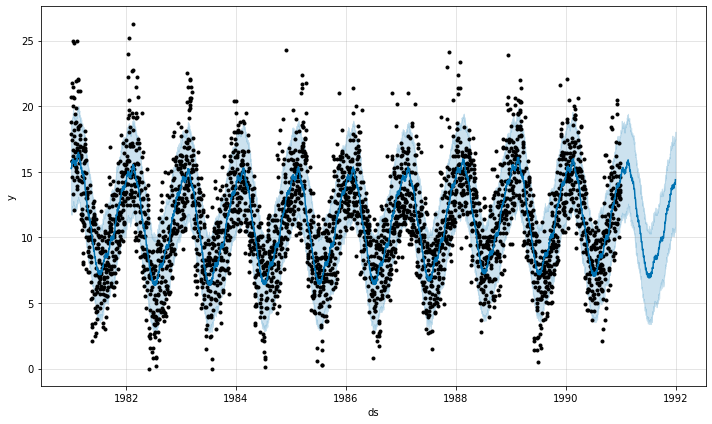

In [27]:
forecast = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.01).fit(df).predict(future)

fig = m.plot(forecast)